Youtube

- [ ]  Top (channel) + subscribe percentage
- [ ]  Time (요일/주 사용 시간) + comments/like//search (rader)(중복)
- [ ]  + api (영상 재생길이 중 퍼센티지)
- [ ]  pycharm

Common

- [ ]  pdf (fastapi)
- [ ]  + visual (wordcloud)..

# 1) 시청기록에서 '채널'기준으로 자주본채널 Top10(횟수 카운트)


In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_json(r'/content/drive/MyDrive/paprika/data/youtube_Takeout/YouTube 및 YouTube Music/시청 기록/시청 기록.json', encoding=':UTF-8')
df.to_csv(r'/content/시청 기록2.csv', index = None)
df

,header,title,titleUrl,subtitles,time,products,activityControls,description,details
0,YouTube,[Playlist] 나른하게 불어오는 봄바람에 🌻ㅣ따뜻한 봄날의 여유로움을 만끽하면...,https://www.youtube.com/watch?v=ZTaB-1RkQ_w,"[{'name': 'essential;', 'url': 'https://www.yo...",2022-04-05T00:28:35.867Z,[YouTube],[YouTube 시청 기록],NaN,NaN
1,YouTube,"오를 때 된 삼성전자 ""3분기, 더할나위 없이 좋다"" / 김선형의 팩트체크 / 투자...",https://www.youtube.com/watch?v=aTdDx9-4OVM,"[{'name': '한국경제TV', 'url': 'https://www.youtub...",2022-04-05T00:27:52.740Z,[YouTube],[YouTube 시청 기록],NaN,NaN
2,YouTube,달려라방탄 💜 Run bts 💜 58회 을(를) 시청했습니다.,https://www.youtube.com/watch?v=SDPT_RO3tMI,"[{'name': '🥔 감자', 'url': 'https://www.youtube....",2022-04-04T14:55:40.984Z,[YouTube],[YouTube 시청 기록],NaN,NaN
3,YouTube,방탄소년단 (BTS) '작은 것들을 위한 시 (Boy With Luv)' 교차편집 ...,https://www.youtube.com/watch?v=oFuY5M1lwiY,"[{'name': '호구마 HOGUMA', 'url': 'https://www.yo...",2022-04-04T14:48:08.103Z,[YouTube],[YouTube 시청 기록],NaN,NaN
4,YouTube,[2019 FESTA] BTS (방탄소년단) '방탄다락' #2019BTSFESTA ...,https://www.youtube.com/watch?v=CPW2PCPYzEE,"[{'name': 'BANGTANTV', 'url': 'https://www.you...",2022-04-04T14:47:52.304Z,[YouTube],[YouTube 시청 기록],NaN,NaN
...,...,...,...,...,...,...,...,...,...
31143,YouTube,외국인이 이해 못하는 영어 발음실수 1탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=GvK9fXMwIHs,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:02:23.726Z,[YouTube],[YouTube 시청 기록],NaN,NaN
31144,YouTube,외국인이 이해 못하는 영어 발음실수 2탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=mm3ePulc-SQ,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:02:17.339Z,[YouTube],[YouTube 시청 기록],NaN,NaN
31145,YouTube,미국남자VS 한국남자 연애스타일 차이 을(를) 시청했습니다.,https://www.youtube.com/watch?v=cG5-B2l589Y,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:00:33.026Z,[YouTube],[YouTube 시청 기록],NaN,NaN
31146,YouTube,https://www.youtube.com/watch?v=ICEhb-FC2YI 을(...,https://www.youtube.com/watch?v=ICEhb-FC2YI,NaN,2016-07-18T14:54:17.319Z,[YouTube],[YouTube 시청 기록],NaN,NaN


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31148 entries, 0 to 31147
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   header            31148 non-null  object
 1   title             31148 non-null  object
 2   titleUrl          30687 non-null  object
 3   subtitles         27482 non-null  object
 4   time              31148 non-null  object
 5   products          31148 non-null  object
 6   activityControls  31148 non-null  object
 7   description       292 non-null    object
 8   details           293 non-null    object
dtypes: object(9)
memory usage: 2.1+ MB


## ['subtitle']에서 channel명 column 생성

In [45]:
df.loc[1,'subtitles'][0]['url']

'https://www.youtube.com/channel/UCF8AeLlUbEpKju6v1H6p8Eg'

In [46]:
type(df.loc[1,'subtitles'])

list

In [47]:
type(df['subtitles'])

pandas.core.series.Series

In [48]:
df['name'] = df['subtitles'].map(lambda x: x[0]['name'],na_action='ignore')
df

,header,title,titleUrl,subtitles,time,products,activityControls,description,details,name
0,YouTube,[Playlist] 나른하게 불어오는 봄바람에 🌻ㅣ따뜻한 봄날의 여유로움을 만끽하면...,https://www.youtube.com/watch?v=ZTaB-1RkQ_w,"[{'name': 'essential;', 'url': 'https://www.yo...",2022-04-05T00:28:35.867Z,[YouTube],[YouTube 시청 기록],NaN,NaN,essential;
1,YouTube,"오를 때 된 삼성전자 ""3분기, 더할나위 없이 좋다"" / 김선형의 팩트체크 / 투자...",https://www.youtube.com/watch?v=aTdDx9-4OVM,"[{'name': '한국경제TV', 'url': 'https://www.youtub...",2022-04-05T00:27:52.740Z,[YouTube],[YouTube 시청 기록],NaN,NaN,한국경제TV
2,YouTube,달려라방탄 💜 Run bts 💜 58회 을(를) 시청했습니다.,https://www.youtube.com/watch?v=SDPT_RO3tMI,"[{'name': '🥔 감자', 'url': 'https://www.youtube....",2022-04-04T14:55:40.984Z,[YouTube],[YouTube 시청 기록],NaN,NaN,🥔 감자
3,YouTube,방탄소년단 (BTS) '작은 것들을 위한 시 (Boy With Luv)' 교차편집 ...,https://www.youtube.com/watch?v=oFuY5M1lwiY,"[{'name': '호구마 HOGUMA', 'url': 'https://www.yo...",2022-04-04T14:48:08.103Z,[YouTube],[YouTube 시청 기록],NaN,NaN,호구마 HOGUMA
4,YouTube,[2019 FESTA] BTS (방탄소년단) '방탄다락' #2019BTSFESTA ...,https://www.youtube.com/watch?v=CPW2PCPYzEE,"[{'name': 'BANGTANTV', 'url': 'https://www.you...",2022-04-04T14:47:52.304Z,[YouTube],[YouTube 시청 기록],NaN,NaN,BANGTANTV
...,...,...,...,...,...,...,...,...,...,...
31143,YouTube,외국인이 이해 못하는 영어 발음실수 1탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=GvK9fXMwIHs,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:02:23.726Z,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤
31144,YouTube,외국인이 이해 못하는 영어 발음실수 2탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=mm3ePulc-SQ,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:02:17.339Z,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤
31145,YouTube,미국남자VS 한국남자 연애스타일 차이 을(를) 시청했습니다.,https://www.youtube.com/watch?v=cG5-B2l589Y,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:00:33.026Z,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤
31146,YouTube,https://www.youtube.com/watch?v=ICEhb-FC2YI 을(...,https://www.youtube.com/watch?v=ICEhb-FC2YI,NaN,2016-07-18T14:54:17.319Z,[YouTube],[YouTube 시청 기록],NaN,NaN,NaN


In [49]:
df['url'] = df['subtitles'].map(lambda x: x[0]['url'], na_action='ignore')
df

,header,title,titleUrl,subtitles,time,products,activityControls,description,details,name,url
0,YouTube,[Playlist] 나른하게 불어오는 봄바람에 🌻ㅣ따뜻한 봄날의 여유로움을 만끽하면...,https://www.youtube.com/watch?v=ZTaB-1RkQ_w,"[{'name': 'essential;', 'url': 'https://www.yo...",2022-04-05T00:28:35.867Z,[YouTube],[YouTube 시청 기록],NaN,NaN,essential;,https://www.youtube.com/channel/UCSGC87iX0QhnI...
1,YouTube,"오를 때 된 삼성전자 ""3분기, 더할나위 없이 좋다"" / 김선형의 팩트체크 / 투자...",https://www.youtube.com/watch?v=aTdDx9-4OVM,"[{'name': '한국경제TV', 'url': 'https://www.youtub...",2022-04-05T00:27:52.740Z,[YouTube],[YouTube 시청 기록],NaN,NaN,한국경제TV,https://www.youtube.com/channel/UCF8AeLlUbEpKj...
2,YouTube,달려라방탄 💜 Run bts 💜 58회 을(를) 시청했습니다.,https://www.youtube.com/watch?v=SDPT_RO3tMI,"[{'name': '🥔 감자', 'url': 'https://www.youtube....",2022-04-04T14:55:40.984Z,[YouTube],[YouTube 시청 기록],NaN,NaN,🥔 감자,https://www.youtube.com/channel/UCqJjeqc6lSedC...
3,YouTube,방탄소년단 (BTS) '작은 것들을 위한 시 (Boy With Luv)' 교차편집 ...,https://www.youtube.com/watch?v=oFuY5M1lwiY,"[{'name': '호구마 HOGUMA', 'url': 'https://www.yo...",2022-04-04T14:48:08.103Z,[YouTube],[YouTube 시청 기록],NaN,NaN,호구마 HOGUMA,https://www.youtube.com/channel/UC07i8JgLI1h8O...
4,YouTube,[2019 FESTA] BTS (방탄소년단) '방탄다락' #2019BTSFESTA ...,https://www.youtube.com/watch?v=CPW2PCPYzEE,"[{'name': 'BANGTANTV', 'url': 'https://www.you...",2022-04-04T14:47:52.304Z,[YouTube],[YouTube 시청 기록],NaN,NaN,BANGTANTV,https://www.youtube.com/channel/UCLkAepWjdylmX...
...,...,...,...,...,...,...,...,...,...,...,...
31143,YouTube,외국인이 이해 못하는 영어 발음실수 1탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=GvK9fXMwIHs,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:02:23.726Z,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...
31144,YouTube,외국인이 이해 못하는 영어 발음실수 2탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=mm3ePulc-SQ,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:02:17.339Z,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...
31145,YouTube,미국남자VS 한국남자 연애스타일 차이 을(를) 시청했습니다.,https://www.youtube.com/watch?v=cG5-B2l589Y,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:00:33.026Z,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...
31146,YouTube,https://www.youtube.com/watch?v=ICEhb-FC2YI 을(...,https://www.youtube.com/watch?v=ICEhb-FC2YI,NaN,2016-07-18T14:54:17.319Z,[YouTube],[YouTube 시청 기록],NaN,NaN,NaN,NaN


## 광고(NaN)제거

In [50]:
df = df.dropna(subset=['name'])
df

,header,title,titleUrl,subtitles,time,products,activityControls,description,details,name,url
0,YouTube,[Playlist] 나른하게 불어오는 봄바람에 🌻ㅣ따뜻한 봄날의 여유로움을 만끽하면...,https://www.youtube.com/watch?v=ZTaB-1RkQ_w,"[{'name': 'essential;', 'url': 'https://www.yo...",2022-04-05T00:28:35.867Z,[YouTube],[YouTube 시청 기록],NaN,NaN,essential;,https://www.youtube.com/channel/UCSGC87iX0QhnI...
1,YouTube,"오를 때 된 삼성전자 ""3분기, 더할나위 없이 좋다"" / 김선형의 팩트체크 / 투자...",https://www.youtube.com/watch?v=aTdDx9-4OVM,"[{'name': '한국경제TV', 'url': 'https://www.youtub...",2022-04-05T00:27:52.740Z,[YouTube],[YouTube 시청 기록],NaN,NaN,한국경제TV,https://www.youtube.com/channel/UCF8AeLlUbEpKj...
2,YouTube,달려라방탄 💜 Run bts 💜 58회 을(를) 시청했습니다.,https://www.youtube.com/watch?v=SDPT_RO3tMI,"[{'name': '🥔 감자', 'url': 'https://www.youtube....",2022-04-04T14:55:40.984Z,[YouTube],[YouTube 시청 기록],NaN,NaN,🥔 감자,https://www.youtube.com/channel/UCqJjeqc6lSedC...
3,YouTube,방탄소년단 (BTS) '작은 것들을 위한 시 (Boy With Luv)' 교차편집 ...,https://www.youtube.com/watch?v=oFuY5M1lwiY,"[{'name': '호구마 HOGUMA', 'url': 'https://www.yo...",2022-04-04T14:48:08.103Z,[YouTube],[YouTube 시청 기록],NaN,NaN,호구마 HOGUMA,https://www.youtube.com/channel/UC07i8JgLI1h8O...
4,YouTube,[2019 FESTA] BTS (방탄소년단) '방탄다락' #2019BTSFESTA ...,https://www.youtube.com/watch?v=CPW2PCPYzEE,"[{'name': 'BANGTANTV', 'url': 'https://www.you...",2022-04-04T14:47:52.304Z,[YouTube],[YouTube 시청 기록],NaN,NaN,BANGTANTV,https://www.youtube.com/channel/UCLkAepWjdylmX...
...,...,...,...,...,...,...,...,...,...,...,...
31142,YouTube,헝가리 아이들이 한국어를 만났을 때(Hungarian Kids React to Ko...,https://www.youtube.com/watch?v=ELEZ-1rAWsI,"[{'name': '문화포털', 'url': 'https://www.youtube....",2016-07-18T15:03:27.782Z,[YouTube],[YouTube 시청 기록],NaN,NaN,문화포털,https://www.youtube.com/channel/UCl02ZJk18gXDf...
31143,YouTube,외국인이 이해 못하는 영어 발음실수 1탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=GvK9fXMwIHs,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:02:23.726Z,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...
31144,YouTube,외국인이 이해 못하는 영어 발음실수 2탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=mm3ePulc-SQ,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:02:17.339Z,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...
31145,YouTube,미국남자VS 한국남자 연애스타일 차이 을(를) 시청했습니다.,https://www.youtube.com/watch?v=cG5-B2l589Y,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:00:33.026Z,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...


## + 연도/월별 분리

In [51]:
df_22 = df[df['time'].str.contains('2022')]
df_22

,header,title,titleUrl,subtitles,time,products,activityControls,description,details,name,url
0,YouTube,[Playlist] 나른하게 불어오는 봄바람에 🌻ㅣ따뜻한 봄날의 여유로움을 만끽하면...,https://www.youtube.com/watch?v=ZTaB-1RkQ_w,"[{'name': 'essential;', 'url': 'https://www.yo...",2022-04-05T00:28:35.867Z,[YouTube],[YouTube 시청 기록],NaN,NaN,essential;,https://www.youtube.com/channel/UCSGC87iX0QhnI...
1,YouTube,"오를 때 된 삼성전자 ""3분기, 더할나위 없이 좋다"" / 김선형의 팩트체크 / 투자...",https://www.youtube.com/watch?v=aTdDx9-4OVM,"[{'name': '한국경제TV', 'url': 'https://www.youtub...",2022-04-05T00:27:52.740Z,[YouTube],[YouTube 시청 기록],NaN,NaN,한국경제TV,https://www.youtube.com/channel/UCF8AeLlUbEpKj...
2,YouTube,달려라방탄 💜 Run bts 💜 58회 을(를) 시청했습니다.,https://www.youtube.com/watch?v=SDPT_RO3tMI,"[{'name': '🥔 감자', 'url': 'https://www.youtube....",2022-04-04T14:55:40.984Z,[YouTube],[YouTube 시청 기록],NaN,NaN,🥔 감자,https://www.youtube.com/channel/UCqJjeqc6lSedC...
3,YouTube,방탄소년단 (BTS) '작은 것들을 위한 시 (Boy With Luv)' 교차편집 ...,https://www.youtube.com/watch?v=oFuY5M1lwiY,"[{'name': '호구마 HOGUMA', 'url': 'https://www.yo...",2022-04-04T14:48:08.103Z,[YouTube],[YouTube 시청 기록],NaN,NaN,호구마 HOGUMA,https://www.youtube.com/channel/UC07i8JgLI1h8O...
4,YouTube,[2019 FESTA] BTS (방탄소년단) '방탄다락' #2019BTSFESTA ...,https://www.youtube.com/watch?v=CPW2PCPYzEE,"[{'name': 'BANGTANTV', 'url': 'https://www.you...",2022-04-04T14:47:52.304Z,[YouTube],[YouTube 시청 기록],NaN,NaN,BANGTANTV,https://www.youtube.com/channel/UCLkAepWjdylmX...
...,...,...,...,...,...,...,...,...,...,...,...
2162,YouTube,[해피투게더]스타들의 별난 개인기_정혜성_주토피아 나무늘보 완벽복사 을(를) 시청했...,https://www.youtube.com/watch?v=kiViCWpr4rE,"[{'name': 'KBS HUMAN: 뭉클티비', 'url': 'https://w...",2022-01-02T01:54:58.663Z,[YouTube],[YouTube 시청 기록],NaN,NaN,KBS HUMAN: 뭉클티비,https://www.youtube.com/channel/UC6wiUwl7dPhZO...
2163,YouTube,[Playlist] 사르르 부드럽게 녹아드는ㅣ추운 날 듣기 좋은 멜로우 알앤비ㅣme...,https://www.youtube.com/watch?v=z060aThI9qM,"[{'name': 'essential;', 'url': 'https://www.yo...",2022-01-01T10:39:43.910Z,[YouTube],[YouTube 시청 기록],NaN,NaN,essential;,https://www.youtube.com/channel/UCSGC87iX0QhnI...
2164,YouTube,[Playlist] 추운 겨울 따뜻한 위스키 한 잔ㅣ글렌피딕과 함께하는 무드있는 연...,https://www.youtube.com/watch?v=qDBaVO-B42E,"[{'name': 'essential;', 'url': 'https://www.yo...",2022-01-01T10:39:32.514Z,[YouTube],[YouTube 시청 기록],NaN,NaN,essential;,https://www.youtube.com/channel/UCSGC87iX0QhnI...
2165,YouTube,(ENG) 띵동📣 띵동📣 주문 제발 🍗닭🍗쳐... 주문폭주에 멘탈 순살치킨 됨 | ...,https://www.youtube.com/watch?v=bApoYZBPCLE,"[{'name': '워크맨-Workman', 'url': 'https://www.y...",2022-01-01T07:02:28.591Z,[YouTube],[YouTube 시청 기록],NaN,NaN,워크맨-Workman,https://www.youtube.com/channel/UCwx6n_4OcLgzA...


In [52]:
df_2204 = df[df['time'].str.contains('2022-04')]
df_2204

,header,title,titleUrl,subtitles,time,products,activityControls,description,details,name,url
0,YouTube,[Playlist] 나른하게 불어오는 봄바람에 🌻ㅣ따뜻한 봄날의 여유로움을 만끽하면...,https://www.youtube.com/watch?v=ZTaB-1RkQ_w,"[{'name': 'essential;', 'url': 'https://www.yo...",2022-04-05T00:28:35.867Z,[YouTube],[YouTube 시청 기록],NaN,NaN,essential;,https://www.youtube.com/channel/UCSGC87iX0QhnI...
1,YouTube,"오를 때 된 삼성전자 ""3분기, 더할나위 없이 좋다"" / 김선형의 팩트체크 / 투자...",https://www.youtube.com/watch?v=aTdDx9-4OVM,"[{'name': '한국경제TV', 'url': 'https://www.youtub...",2022-04-05T00:27:52.740Z,[YouTube],[YouTube 시청 기록],NaN,NaN,한국경제TV,https://www.youtube.com/channel/UCF8AeLlUbEpKj...
2,YouTube,달려라방탄 💜 Run bts 💜 58회 을(를) 시청했습니다.,https://www.youtube.com/watch?v=SDPT_RO3tMI,"[{'name': '🥔 감자', 'url': 'https://www.youtube....",2022-04-04T14:55:40.984Z,[YouTube],[YouTube 시청 기록],NaN,NaN,🥔 감자,https://www.youtube.com/channel/UCqJjeqc6lSedC...
3,YouTube,방탄소년단 (BTS) '작은 것들을 위한 시 (Boy With Luv)' 교차편집 ...,https://www.youtube.com/watch?v=oFuY5M1lwiY,"[{'name': '호구마 HOGUMA', 'url': 'https://www.yo...",2022-04-04T14:48:08.103Z,[YouTube],[YouTube 시청 기록],NaN,NaN,호구마 HOGUMA,https://www.youtube.com/channel/UC07i8JgLI1h8O...
4,YouTube,[2019 FESTA] BTS (방탄소년단) '방탄다락' #2019BTSFESTA ...,https://www.youtube.com/watch?v=CPW2PCPYzEE,"[{'name': 'BANGTANTV', 'url': 'https://www.you...",2022-04-04T14:47:52.304Z,[YouTube],[YouTube 시청 기록],NaN,NaN,BANGTANTV,https://www.youtube.com/channel/UCLkAepWjdylmX...
7,YouTube,"[Sub] 달려라방탄 💜125회 💜 Run BTS 백종원 출연! ""K-햄 특집"" ...",https://www.youtube.com/watch?v=24bBMvsWyZ4,"[{'name': 'Run BTS, 달방', 'url': 'https://www.y...",2022-04-04T14:44:50.851Z,[YouTube],[YouTube 시청 기록],NaN,NaN,"Run BTS, 달방",https://www.youtube.com/channel/UCpRRqG9PTGBWe...
8,YouTube,[방탄소년단] 그냥 먹기만 하는 탄이들...,https://www.youtube.com/watch?v=kljbIjB1870,"[{'name': '케이홉이', 'url': 'https://www.youtube....",2022-04-04T14:44:31.309Z,[YouTube],[YouTube 시청 기록],NaN,NaN,케이홉이,https://www.youtube.com/channel/UCpqTyfg12JjaN...
9,YouTube,[SUB] Run BTS! EP.103 아바타 요리왕 2 달방 달려라방탄 을(를) ...,https://www.youtube.com/watch?v=59OkIra5wKs,"[{'name': 'Run BTS 김아미', 'url': 'https://www.y...",2022-04-04T14:44:20.978Z,[YouTube],[YouTube 시청 기록],NaN,NaN,Run BTS 김아미,https://www.youtube.com/channel/UCsqJzo72SOFJ5...
10,YouTube,[SUB] Run BTS! EP.102 아바타 요리왕 1 달방 달려라방탄 을(를) ...,https://www.youtube.com/watch?v=bAXoNnL8GMU,"[{'name': 'Run BTS 김아미', 'url': 'https://www.y...",2022-04-04T14:44:00.163Z,[YouTube],[YouTube 시청 기록],NaN,NaN,Run BTS 김아미,https://www.youtube.com/channel/UCsqJzo72SOFJ5...
11,YouTube,[예고] 정훈이 형 알나리깔나리~ 아내 한가인과 동반 출연❤️ [1박 2일 시즌4]...,https://www.youtube.com/watch?v=uR9vI2_Ennc,"[{'name': 'KBS Entertain', 'url': 'https://www...",2022-04-04T14:42:40.614Z,[YouTube],[YouTube 시청 기록],NaN,NaN,KBS Entertain,https://www.youtube.com/channel/UCK1sVuXaDvJeN...


# (1) 'name' top - 시각화 

In [53]:
df['name'].value_counts().head(10)

MBCentertainment          1304
길벗시나공 IT                  1093
tvN D ENT                 1082
디글 클래식 :Diggle Classic     969
tvN                        932
tvN drama                  841
MBCdrama                   771
JTBC Entertainment         767
JTBC Voyage                393
옛드 : MBC 레전드 드라마           369
Name: name, dtype: int64

In [54]:
top10 = pd.DataFrame(df['name'].value_counts().head(10))
top10

,name
MBCentertainment,1304
길벗시나공 IT,1093
tvN D ENT,1082
디글 클래식 :Diggle Classic,969
tvN,932
tvN drama,841
MBCdrama,771
JTBC Entertainment,767
JTBC Voyage,393
옛드 : MBC 레전드 드라마,369


In [55]:
top10 = top10.reset_index()
top10

,index,name
0,MBCentertainment,1304
1,길벗시나공 IT,1093
2,tvN D ENT,1082
3,디글 클래식 :Diggle Classic,969
4,tvN,932
5,tvN drama,841
6,MBCdrama,771
7,JTBC Entertainment,767
8,JTBC Voyage,393
9,옛드 : MBC 레전드 드라마,369


In [56]:
top10 = top10.rename(columns={'index':'Name','name':'Count'})
top10

,Name,Count
0,MBCentertainment,1304
1,길벗시나공 IT,1093
2,tvN D ENT,1082
3,디글 클래식 :Diggle Classic,969
4,tvN,932
5,tvN drama,841
6,MBCdrama,771
7,JTBC Entertainment,767
8,JTBC Voyage,393
9,옛드 : MBC 레전드 드라마,369


In [57]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [58]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당
font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일 설정
plt.style.use("ggplot")

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [59]:
### Q 범례

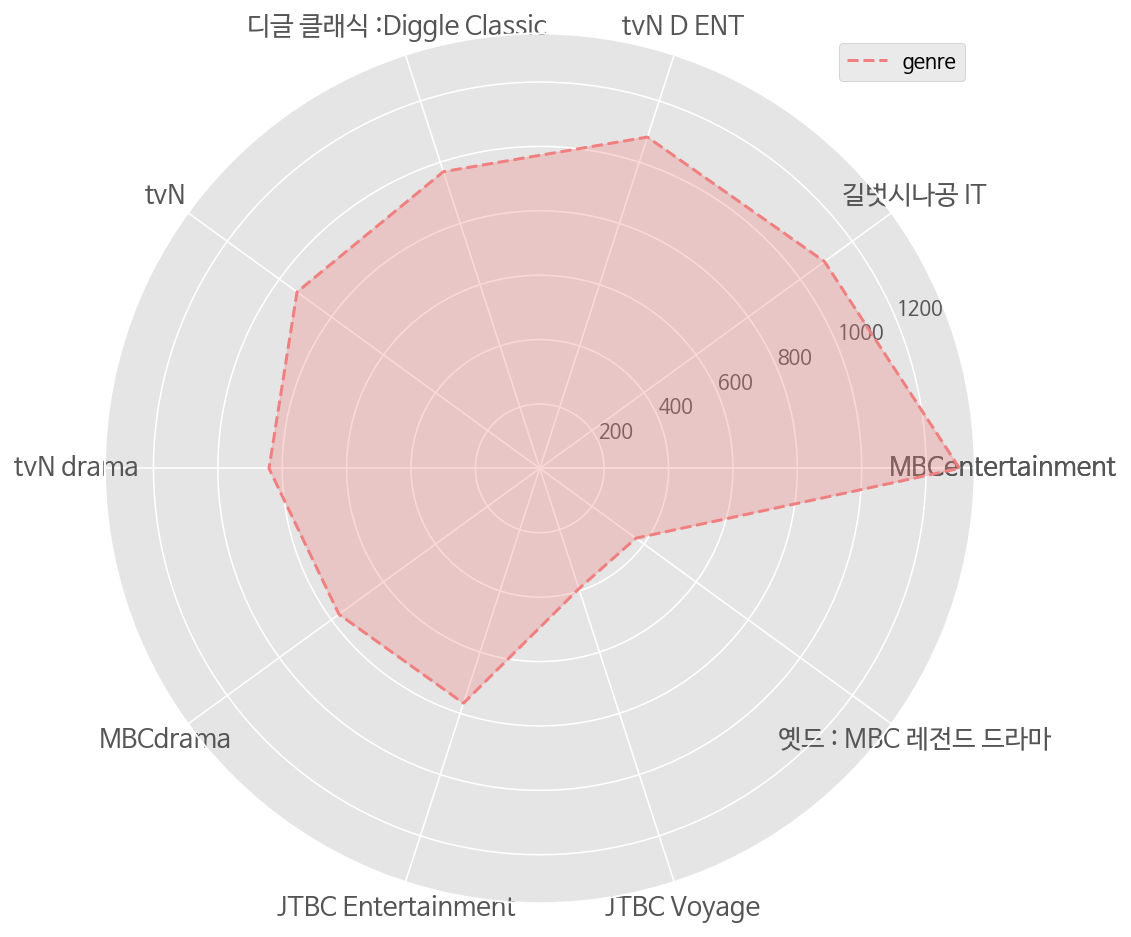

In [60]:
categories = top10["Name"]
categories = [*categories, categories[0]]

top10_count = top10["Count"]
count = [*top10_count, top10_count[0]]


label_loc = np.linspace(start=0, stop=2*np.pi, num=len(count))


plt.figure(figsize=(8,8))

ax = plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories, fontsize=13)
ax.plot(label_loc, count, label='genre', linestyle='dashed', color='lightcoral')
ax.fill(label_loc, count, color='lightcoral', alpha=0.3)
ax.legend()
plt.show()

###Q 장르별 색상

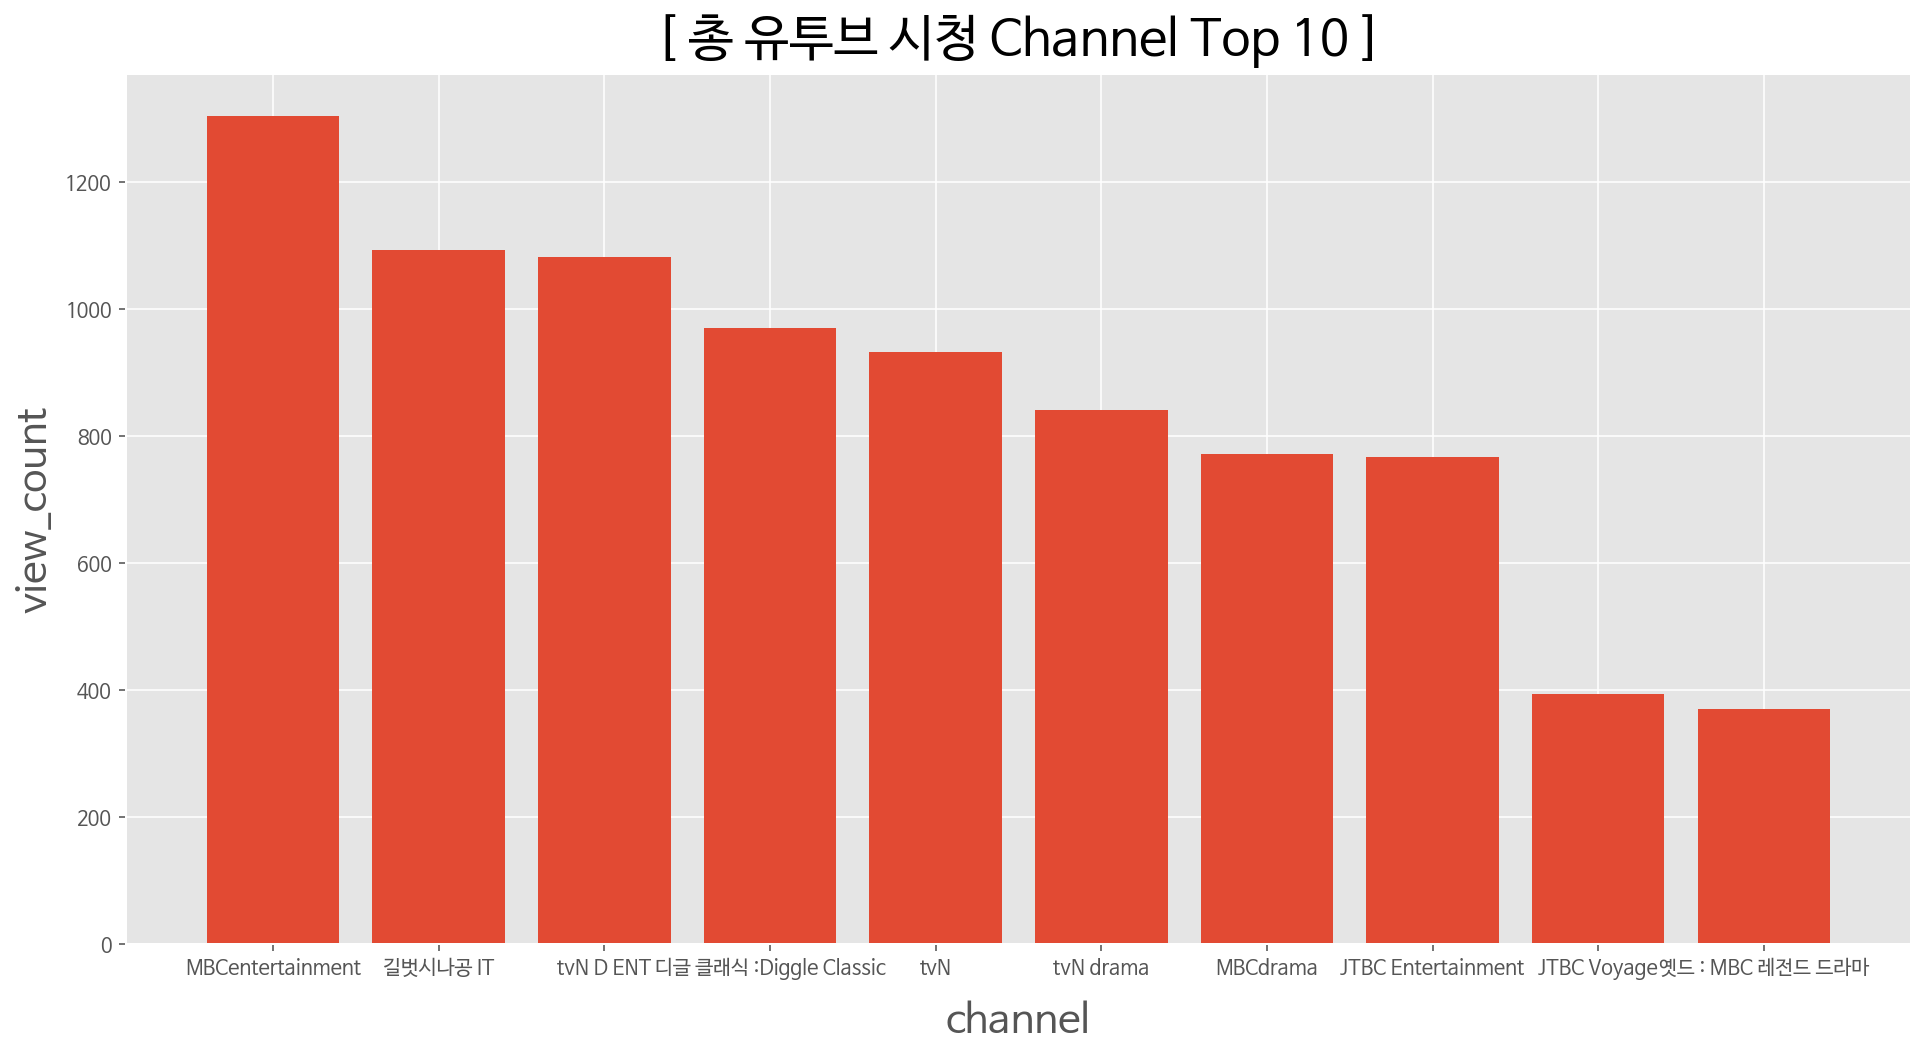

In [61]:
plt.figure(figsize=(16,8))
plt.title("[ 총 유투브 시청 Channel Top 10 ]", size=25, pad=10)

#plt.bar(x, y)
plt.xlabel("channel", size=20, labelpad=10)
plt.ylabel("view_count", size=20)


plt.bar(top10["Name"], top10["Count"])
plt.show()

## 연도별 구분

In [62]:
df_22['name'].value_counts().head(10)

MBCentertainment    143
essential;          111
제이크 토익스피킹            65
HK CODE              56
데이터에듀                53
BANGTANTV            39
거친코딩                 31
tvN D ENT            29
유우키의 일본이야기 YUUKI     29
크리애플creApple         27
Name: name, dtype: int64

In [110]:
top10_22 = pd.DataFrame(df_22['name'].value_counts().head(10))
top10_22

,name
MBCentertainment,143
essential;,111
제이크 토익스피킹,65
HK CODE,56
데이터에듀,53
BANGTANTV,39
거친코딩,31
tvN D ENT,29
유우키의 일본이야기 YUUKI,29
크리애플creApple,27


In [111]:
top10_22 = top10_22.reset_index()
top10_22

,index,name
0,MBCentertainment,143
1,essential;,111
2,제이크 토익스피킹,65
3,HK CODE,56
4,데이터에듀,53
5,BANGTANTV,39
6,거친코딩,31
7,tvN D ENT,29
8,유우키의 일본이야기 YUUKI,29
9,크리애플creApple,27


In [65]:
top10_22 = top10_22.rename(columns={'index':'Name','name':'Count'})
top10_22

,Name,Count
0,MBCentertainment,143
1,essential;,111
2,제이크 토익스피킹,65
3,HK CODE,56
4,데이터에듀,53
5,BANGTANTV,39
6,거친코딩,31
7,tvN D ENT,29
8,유우키의 일본이야기 YUUKI,29
9,크리애플creApple,27


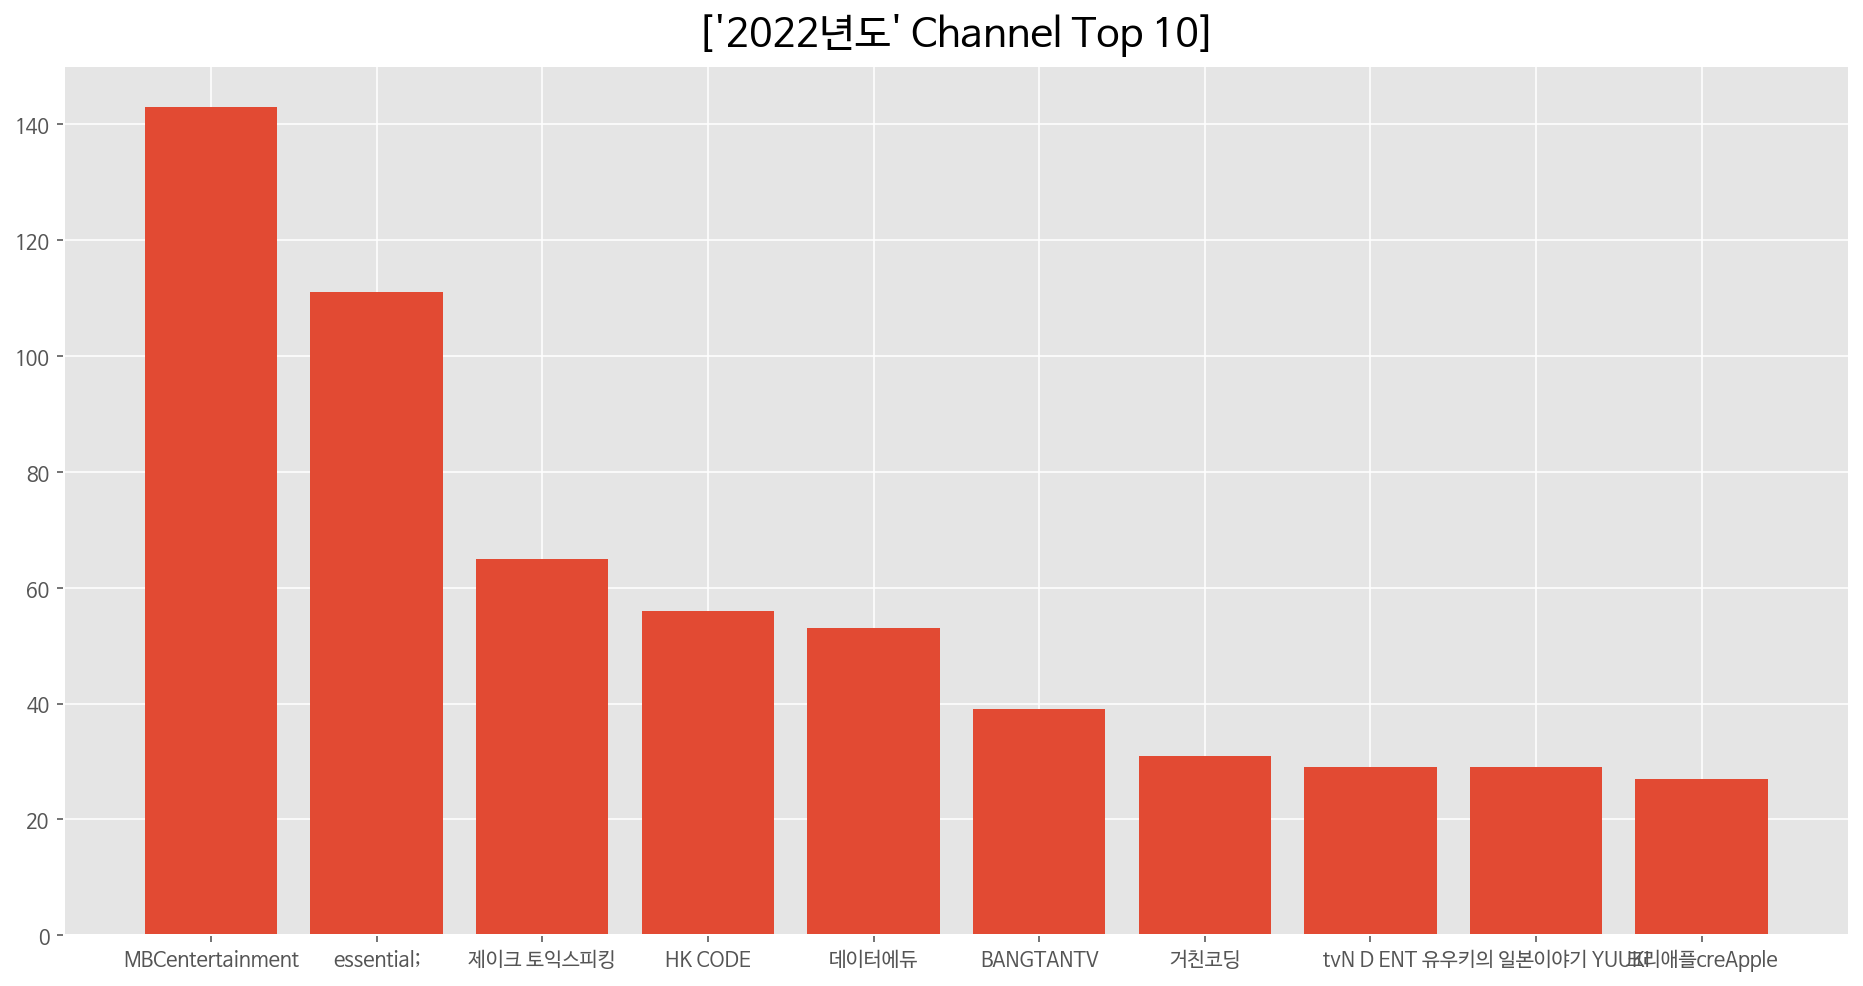

In [66]:
plt.figure(figsize=(16,8))
plt.title("['2022년도' Channel Top 10]", size=20, pad=10)
plt.bar(top10_22["Name"], top10_22["Count"])
plt.show()

## 월별 구분

In [67]:
df_2204['name'].value_counts().head(10)

essential;                 5
맬튜브                        3
1theK (원더케이)               2
BANGTANTV                  2
Run BTS 김아미                2
SBS NOW / SBS 공식 채널        1
걍밍경                        1
Various Artists - Topic    1
총각차트                       1
Jo Sung Mo - Topic         1
Name: name, dtype: int64

In [68]:
top10_2204 = pd.DataFrame(df_2204['name'].value_counts().head(10))

In [69]:
top10_2204 = top10_2204.reset_index()

In [70]:
top10_2204 = top10_2204.rename(columns={'index':'Name','name':'Count'})
top10_2204

,Name,Count
0,essential;,5
1,맬튜브,3
2,1theK (원더케이),2
3,BANGTANTV,2
4,Run BTS 김아미,2
5,SBS NOW / SBS 공식 채널,1
6,걍밍경,1
7,Various Artists - Topic,1
8,총각차트,1
9,Jo Sung Mo - Topic,1


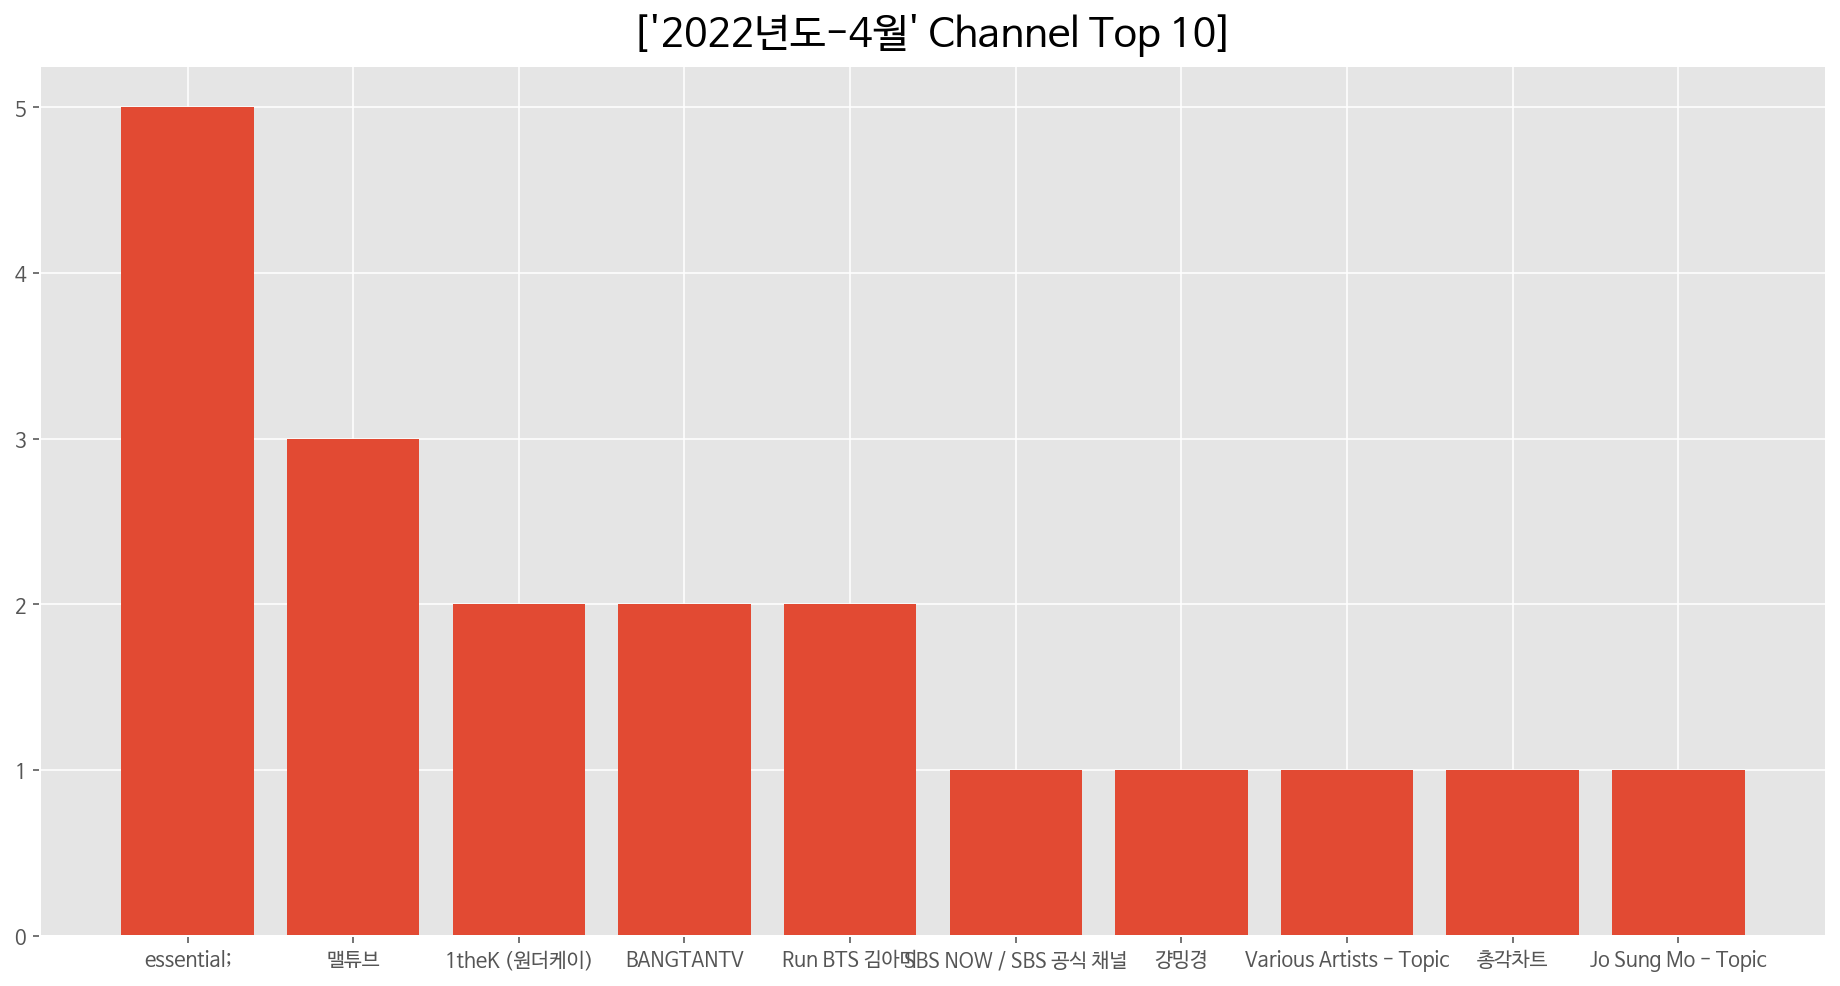

In [71]:
plt.figure(figsize=(16,8))
plt.title("['2022년도-4월' Channel Top 10]", size=20, pad=10)
plt.bar(top10_2204["Name"], top10_2204["Count"])
plt.show()

# (2) 시청목록 중 '구독채널'의 퍼센티지

In [72]:
import csv
 
df_sub = pd.read_csv("/content/drive/MyDrive/paprika/data/youtube_Takeout/YouTube 및 YouTube Music/구독정보/구독정보.csv")
df_sub

,채널 ID,채널 URL,채널 제목
0,UC--LgKcZVgffjsxudoXg5pQ,http://www.youtube.com/channel/UC--LgKcZVgffjs...,You Han Lee
1,UC-BqPABOl7c7rR5EoJJZ0UA,http://www.youtube.com/channel/UC-BqPABOl7c7rR...,방언니 - 방송국에 사는 언니들
2,UC-Bsa2ivAGWq7bsSPrPGFVA,http://www.youtube.com/channel/UC-Bsa2ivAGWq7b...,입짧은햇님
3,UC-CnwTZJ_A5v-AQK92fNYKw,http://www.youtube.com/channel/UC-CnwTZJ_A5v-A...,maji마지
4,UC-E6yXOi8dnVoFD3jBhZ6FQ,http://www.youtube.com/channel/UC-E6yXOi8dnVoF...,HK CODE
...,...,...,...
327,UCzCedBCSSltI1TFd3bKyN6g,http://www.youtube.com/channel/UCzCedBCSSltI1T...,EXO
328,UCza_sEjIhb1yhvVZEdEl6gA,http://www.youtube.com/channel/UCza_sEjIhb1yhv...,이태리 파브리 Italy Fabri
329,UCzdbSSskA2beQUAVq2Jw1lA,http://www.youtube.com/channel/UCzdbSSskA2beQU...,이라이라경 ravely
330,UCzjDgV-G8_J-iRbkYktqyGQ,http://www.youtube.com/channel/UCzjDgV-G8_J-iR...,속삭이는몽자


In [73]:
channel_dict = dict.fromkeys(df_sub['채널 제목'].tolist(), 1)

In [74]:
df

,header,title,titleUrl,subtitles,time,products,activityControls,description,details,name,url
0,YouTube,[Playlist] 나른하게 불어오는 봄바람에 🌻ㅣ따뜻한 봄날의 여유로움을 만끽하면...,https://www.youtube.com/watch?v=ZTaB-1RkQ_w,"[{'name': 'essential;', 'url': 'https://www.yo...",2022-04-05T00:28:35.867Z,[YouTube],[YouTube 시청 기록],NaN,NaN,essential;,https://www.youtube.com/channel/UCSGC87iX0QhnI...
1,YouTube,"오를 때 된 삼성전자 ""3분기, 더할나위 없이 좋다"" / 김선형의 팩트체크 / 투자...",https://www.youtube.com/watch?v=aTdDx9-4OVM,"[{'name': '한국경제TV', 'url': 'https://www.youtub...",2022-04-05T00:27:52.740Z,[YouTube],[YouTube 시청 기록],NaN,NaN,한국경제TV,https://www.youtube.com/channel/UCF8AeLlUbEpKj...
2,YouTube,달려라방탄 💜 Run bts 💜 58회 을(를) 시청했습니다.,https://www.youtube.com/watch?v=SDPT_RO3tMI,"[{'name': '🥔 감자', 'url': 'https://www.youtube....",2022-04-04T14:55:40.984Z,[YouTube],[YouTube 시청 기록],NaN,NaN,🥔 감자,https://www.youtube.com/channel/UCqJjeqc6lSedC...
3,YouTube,방탄소년단 (BTS) '작은 것들을 위한 시 (Boy With Luv)' 교차편집 ...,https://www.youtube.com/watch?v=oFuY5M1lwiY,"[{'name': '호구마 HOGUMA', 'url': 'https://www.yo...",2022-04-04T14:48:08.103Z,[YouTube],[YouTube 시청 기록],NaN,NaN,호구마 HOGUMA,https://www.youtube.com/channel/UC07i8JgLI1h8O...
4,YouTube,[2019 FESTA] BTS (방탄소년단) '방탄다락' #2019BTSFESTA ...,https://www.youtube.com/watch?v=CPW2PCPYzEE,"[{'name': 'BANGTANTV', 'url': 'https://www.you...",2022-04-04T14:47:52.304Z,[YouTube],[YouTube 시청 기록],NaN,NaN,BANGTANTV,https://www.youtube.com/channel/UCLkAepWjdylmX...
...,...,...,...,...,...,...,...,...,...,...,...
31142,YouTube,헝가리 아이들이 한국어를 만났을 때(Hungarian Kids React to Ko...,https://www.youtube.com/watch?v=ELEZ-1rAWsI,"[{'name': '문화포털', 'url': 'https://www.youtube....",2016-07-18T15:03:27.782Z,[YouTube],[YouTube 시청 기록],NaN,NaN,문화포털,https://www.youtube.com/channel/UCl02ZJk18gXDf...
31143,YouTube,외국인이 이해 못하는 영어 발음실수 1탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=GvK9fXMwIHs,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:02:23.726Z,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...
31144,YouTube,외국인이 이해 못하는 영어 발음실수 2탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=mm3ePulc-SQ,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:02:17.339Z,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...
31145,YouTube,미국남자VS 한국남자 연애스타일 차이 을(를) 시청했습니다.,https://www.youtube.com/watch?v=cG5-B2l589Y,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:00:33.026Z,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...


In [75]:
df['name'].map(lambda x: channel_dict.get(x) is not None)

0         True
1         True
2        False
3        False
4         True
         ...  
31142    False
31143    False
31144    False
31145    False
31147    False
Name: name, Length: 27482, dtype: bool

In [76]:
df['is_subscribe'] = df['name'].map(lambda x: channel_dict.get(x) is not None)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,header,title,titleUrl,subtitles,time,products,activityControls,description,details,name,url,is_subscribe
0,YouTube,[Playlist] 나른하게 불어오는 봄바람에 🌻ㅣ따뜻한 봄날의 여유로움을 만끽하면...,https://www.youtube.com/watch?v=ZTaB-1RkQ_w,"[{'name': 'essential;', 'url': 'https://www.yo...",2022-04-05T00:28:35.867Z,[YouTube],[YouTube 시청 기록],NaN,NaN,essential;,https://www.youtube.com/channel/UCSGC87iX0QhnI...,True
1,YouTube,"오를 때 된 삼성전자 ""3분기, 더할나위 없이 좋다"" / 김선형의 팩트체크 / 투자...",https://www.youtube.com/watch?v=aTdDx9-4OVM,"[{'name': '한국경제TV', 'url': 'https://www.youtub...",2022-04-05T00:27:52.740Z,[YouTube],[YouTube 시청 기록],NaN,NaN,한국경제TV,https://www.youtube.com/channel/UCF8AeLlUbEpKj...,True
2,YouTube,달려라방탄 💜 Run bts 💜 58회 을(를) 시청했습니다.,https://www.youtube.com/watch?v=SDPT_RO3tMI,"[{'name': '🥔 감자', 'url': 'https://www.youtube....",2022-04-04T14:55:40.984Z,[YouTube],[YouTube 시청 기록],NaN,NaN,🥔 감자,https://www.youtube.com/channel/UCqJjeqc6lSedC...,False
3,YouTube,방탄소년단 (BTS) '작은 것들을 위한 시 (Boy With Luv)' 교차편집 ...,https://www.youtube.com/watch?v=oFuY5M1lwiY,"[{'name': '호구마 HOGUMA', 'url': 'https://www.yo...",2022-04-04T14:48:08.103Z,[YouTube],[YouTube 시청 기록],NaN,NaN,호구마 HOGUMA,https://www.youtube.com/channel/UC07i8JgLI1h8O...,False
4,YouTube,[2019 FESTA] BTS (방탄소년단) '방탄다락' #2019BTSFESTA ...,https://www.youtube.com/watch?v=CPW2PCPYzEE,"[{'name': 'BANGTANTV', 'url': 'https://www.you...",2022-04-04T14:47:52.304Z,[YouTube],[YouTube 시청 기록],NaN,NaN,BANGTANTV,https://www.youtube.com/channel/UCLkAepWjdylmX...,True
...,...,...,...,...,...,...,...,...,...,...,...,...
31142,YouTube,헝가리 아이들이 한국어를 만났을 때(Hungarian Kids React to Ko...,https://www.youtube.com/watch?v=ELEZ-1rAWsI,"[{'name': '문화포털', 'url': 'https://www.youtube....",2016-07-18T15:03:27.782Z,[YouTube],[YouTube 시청 기록],NaN,NaN,문화포털,https://www.youtube.com/channel/UCl02ZJk18gXDf...,False
31143,YouTube,외국인이 이해 못하는 영어 발음실수 1탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=GvK9fXMwIHs,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:02:23.726Z,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...,False
31144,YouTube,외국인이 이해 못하는 영어 발음실수 2탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=mm3ePulc-SQ,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:02:17.339Z,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...,False
31145,YouTube,미국남자VS 한국남자 연애스타일 차이 을(를) 시청했습니다.,https://www.youtube.com/watch?v=cG5-B2l589Y,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:00:33.026Z,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...,False


In [77]:
df['is_subscribe'].value_counts()

False    17605
True      9877
Name: is_subscribe, dtype: int64

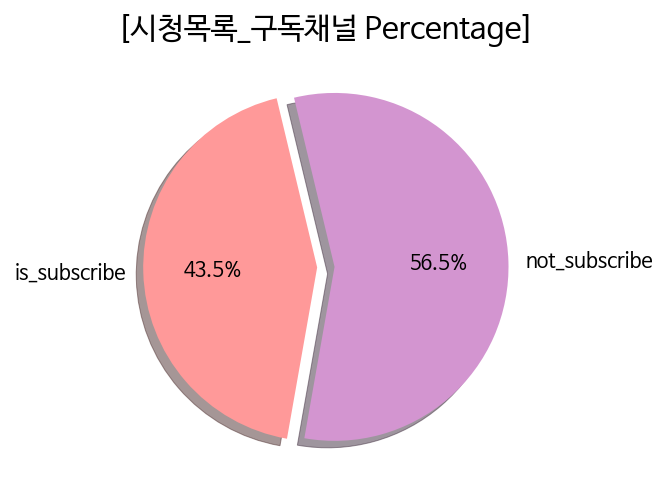

In [78]:
ratio = [13543, 17605]
labels = ['is_subscribe', 'not_subscribe']

explode = [0.05, 0.05]
colors = ['#ff9999', '#d395d0']

plt.title("[시청목록_구독채널 Percentage]", size=15)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

#2) Time (요일/주 사용 시간) *2022년 기준

In [79]:
from math import pi
import time

In [80]:
df

,header,title,titleUrl,subtitles,time,products,activityControls,description,details,name,url,is_subscribe
0,YouTube,[Playlist] 나른하게 불어오는 봄바람에 🌻ㅣ따뜻한 봄날의 여유로움을 만끽하면...,https://www.youtube.com/watch?v=ZTaB-1RkQ_w,"[{'name': 'essential;', 'url': 'https://www.yo...",2022-04-05T00:28:35.867Z,[YouTube],[YouTube 시청 기록],NaN,NaN,essential;,https://www.youtube.com/channel/UCSGC87iX0QhnI...,True
1,YouTube,"오를 때 된 삼성전자 ""3분기, 더할나위 없이 좋다"" / 김선형의 팩트체크 / 투자...",https://www.youtube.com/watch?v=aTdDx9-4OVM,"[{'name': '한국경제TV', 'url': 'https://www.youtub...",2022-04-05T00:27:52.740Z,[YouTube],[YouTube 시청 기록],NaN,NaN,한국경제TV,https://www.youtube.com/channel/UCF8AeLlUbEpKj...,True
2,YouTube,달려라방탄 💜 Run bts 💜 58회 을(를) 시청했습니다.,https://www.youtube.com/watch?v=SDPT_RO3tMI,"[{'name': '🥔 감자', 'url': 'https://www.youtube....",2022-04-04T14:55:40.984Z,[YouTube],[YouTube 시청 기록],NaN,NaN,🥔 감자,https://www.youtube.com/channel/UCqJjeqc6lSedC...,False
3,YouTube,방탄소년단 (BTS) '작은 것들을 위한 시 (Boy With Luv)' 교차편집 ...,https://www.youtube.com/watch?v=oFuY5M1lwiY,"[{'name': '호구마 HOGUMA', 'url': 'https://www.yo...",2022-04-04T14:48:08.103Z,[YouTube],[YouTube 시청 기록],NaN,NaN,호구마 HOGUMA,https://www.youtube.com/channel/UC07i8JgLI1h8O...,False
4,YouTube,[2019 FESTA] BTS (방탄소년단) '방탄다락' #2019BTSFESTA ...,https://www.youtube.com/watch?v=CPW2PCPYzEE,"[{'name': 'BANGTANTV', 'url': 'https://www.you...",2022-04-04T14:47:52.304Z,[YouTube],[YouTube 시청 기록],NaN,NaN,BANGTANTV,https://www.youtube.com/channel/UCLkAepWjdylmX...,True
...,...,...,...,...,...,...,...,...,...,...,...,...
31142,YouTube,헝가리 아이들이 한국어를 만났을 때(Hungarian Kids React to Ko...,https://www.youtube.com/watch?v=ELEZ-1rAWsI,"[{'name': '문화포털', 'url': 'https://www.youtube....",2016-07-18T15:03:27.782Z,[YouTube],[YouTube 시청 기록],NaN,NaN,문화포털,https://www.youtube.com/channel/UCl02ZJk18gXDf...,False
31143,YouTube,외국인이 이해 못하는 영어 발음실수 1탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=GvK9fXMwIHs,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:02:23.726Z,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...,False
31144,YouTube,외국인이 이해 못하는 영어 발음실수 2탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=mm3ePulc-SQ,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:02:17.339Z,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...,False
31145,YouTube,미국남자VS 한국남자 연애스타일 차이 을(를) 시청했습니다.,https://www.youtube.com/watch?v=cG5-B2l589Y,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18T15:00:33.026Z,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...,False


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27482 entries, 0 to 31147
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   header            27482 non-null  object
 1   title             27482 non-null  object
 2   titleUrl          27481 non-null  object
 3   subtitles         27482 non-null  object
 4   time              27482 non-null  object
 5   products          27482 non-null  object
 6   activityControls  27482 non-null  object
 7   description       2 non-null      object
 8   details           0 non-null      object
 9   name              27482 non-null  object
 10  url               27482 non-null  object
 11  is_subscribe      27482 non-null  bool  
dtypes: bool(1), object(11)
memory usage: 2.5+ MB


## Start Time을 DateTime type으로 바꾸기

In [82]:
df["time"] = pd.to_datetime(df["time"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27482 entries, 0 to 31147
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   header            27482 non-null  object             
 1   title             27482 non-null  object             
 2   titleUrl          27481 non-null  object             
 3   subtitles         27482 non-null  object             
 4   time              27482 non-null  datetime64[ns, UTC]
 5   products          27482 non-null  object             
 6   activityControls  27482 non-null  object             
 7   description       2 non-null      object             
 8   details           0 non-null      object             
 9   name              27482 non-null  object             
 10  url               27482 non-null  object             
 11  is_subscribe      27482 non-null  bool               
dtypes: bool(1), datetime64[ns, UTC](1), object(10)
memory usage:

## UTC > 한국시간 변경

In [86]:
df['time']

0       2022-04-05 00:28:35.867000+00:00
1       2022-04-05 00:27:52.740000+00:00
2       2022-04-04 14:55:40.984000+00:00
3       2022-04-04 14:48:08.103000+00:00
4       2022-04-04 14:47:52.304000+00:00
                      ...               
31142   2016-07-18 15:03:27.782000+00:00
31143   2016-07-18 15:02:23.726000+00:00
31144   2016-07-18 15:02:17.339000+00:00
31145   2016-07-18 15:00:33.026000+00:00
31147   2016-07-18 12:06:19.566000+00:00
Name: time, Length: 27482, dtype: datetime64[ns, UTC]

In [84]:
df['ktime'] = df.time.dt.tz_convert('Asia/Seoul').dt.tz_localize(None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
df.ktime 

0       2022-04-05 09:28:35.867
1       2022-04-05 09:27:52.740
2       2022-04-04 23:55:40.984
3       2022-04-04 23:48:08.103
4       2022-04-04 23:47:52.304
                  ...          
31142   2016-07-19 00:03:27.782
31143   2016-07-19 00:02:23.726
31144   2016-07-19 00:02:17.339
31145   2016-07-19 00:00:33.026
31147   2016-07-18 21:06:19.566
Name: ktime, Length: 27482, dtype: datetime64[ns]

In [87]:
df

,header,title,titleUrl,subtitles,time,products,activityControls,description,details,name,url,is_subscribe,ktime
0,YouTube,[Playlist] 나른하게 불어오는 봄바람에 🌻ㅣ따뜻한 봄날의 여유로움을 만끽하면...,https://www.youtube.com/watch?v=ZTaB-1RkQ_w,"[{'name': 'essential;', 'url': 'https://www.yo...",2022-04-05 00:28:35.867000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,essential;,https://www.youtube.com/channel/UCSGC87iX0QhnI...,True,2022-04-05 09:28:35.867
1,YouTube,"오를 때 된 삼성전자 ""3분기, 더할나위 없이 좋다"" / 김선형의 팩트체크 / 투자...",https://www.youtube.com/watch?v=aTdDx9-4OVM,"[{'name': '한국경제TV', 'url': 'https://www.youtub...",2022-04-05 00:27:52.740000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,한국경제TV,https://www.youtube.com/channel/UCF8AeLlUbEpKj...,True,2022-04-05 09:27:52.740
2,YouTube,달려라방탄 💜 Run bts 💜 58회 을(를) 시청했습니다.,https://www.youtube.com/watch?v=SDPT_RO3tMI,"[{'name': '🥔 감자', 'url': 'https://www.youtube....",2022-04-04 14:55:40.984000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,🥔 감자,https://www.youtube.com/channel/UCqJjeqc6lSedC...,False,2022-04-04 23:55:40.984
3,YouTube,방탄소년단 (BTS) '작은 것들을 위한 시 (Boy With Luv)' 교차편집 ...,https://www.youtube.com/watch?v=oFuY5M1lwiY,"[{'name': '호구마 HOGUMA', 'url': 'https://www.yo...",2022-04-04 14:48:08.103000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,호구마 HOGUMA,https://www.youtube.com/channel/UC07i8JgLI1h8O...,False,2022-04-04 23:48:08.103
4,YouTube,[2019 FESTA] BTS (방탄소년단) '방탄다락' #2019BTSFESTA ...,https://www.youtube.com/watch?v=CPW2PCPYzEE,"[{'name': 'BANGTANTV', 'url': 'https://www.you...",2022-04-04 14:47:52.304000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,BANGTANTV,https://www.youtube.com/channel/UCLkAepWjdylmX...,True,2022-04-04 23:47:52.304
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31142,YouTube,헝가리 아이들이 한국어를 만났을 때(Hungarian Kids React to Ko...,https://www.youtube.com/watch?v=ELEZ-1rAWsI,"[{'name': '문화포털', 'url': 'https://www.youtube....",2016-07-18 15:03:27.782000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,문화포털,https://www.youtube.com/channel/UCl02ZJk18gXDf...,False,2016-07-19 00:03:27.782
31143,YouTube,외국인이 이해 못하는 영어 발음실수 1탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=GvK9fXMwIHs,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18 15:02:23.726000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...,False,2016-07-19 00:02:23.726
31144,YouTube,외국인이 이해 못하는 영어 발음실수 2탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=mm3ePulc-SQ,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18 15:02:17.339000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...,False,2016-07-19 00:02:17.339
31145,YouTube,미국남자VS 한국남자 연애스타일 차이 을(를) 시청했습니다.,https://www.youtube.com/watch?v=cG5-B2l589Y,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18 15:00:33.026000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...,False,2016-07-19 00:00:33.026


## 날짜 분리
연도 / 월 / 일 / 요일

In [88]:
df["Year"] = df["ktime"].dt.year
df["Month"] = df["ktime"].dt.month
df["Day"] = df["ktime"].dt.day
df["Day_name"] = df["ktime"].dt.day_name()
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,header,title,titleUrl,subtitles,time,products,activityControls,description,details,name,url,is_subscribe,ktime,Year,Month,Day,Day_name
0,YouTube,[Playlist] 나른하게 불어오는 봄바람에 🌻ㅣ따뜻한 봄날의 여유로움을 만끽하면...,https://www.youtube.com/watch?v=ZTaB-1RkQ_w,"[{'name': 'essential;', 'url': 'https://www.yo...",2022-04-05 00:28:35.867000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,essential;,https://www.youtube.com/channel/UCSGC87iX0QhnI...,True,2022-04-05 09:28:35.867,2022,4,5,Tuesday
1,YouTube,"오를 때 된 삼성전자 ""3분기, 더할나위 없이 좋다"" / 김선형의 팩트체크 / 투자...",https://www.youtube.com/watch?v=aTdDx9-4OVM,"[{'name': '한국경제TV', 'url': 'https://www.youtub...",2022-04-05 00:27:52.740000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,한국경제TV,https://www.youtube.com/channel/UCF8AeLlUbEpKj...,True,2022-04-05 09:27:52.740,2022,4,5,Tuesday
2,YouTube,달려라방탄 💜 Run bts 💜 58회 을(를) 시청했습니다.,https://www.youtube.com/watch?v=SDPT_RO3tMI,"[{'name': '🥔 감자', 'url': 'https://www.youtube....",2022-04-04 14:55:40.984000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,🥔 감자,https://www.youtube.com/channel/UCqJjeqc6lSedC...,False,2022-04-04 23:55:40.984,2022,4,4,Monday
3,YouTube,방탄소년단 (BTS) '작은 것들을 위한 시 (Boy With Luv)' 교차편집 ...,https://www.youtube.com/watch?v=oFuY5M1lwiY,"[{'name': '호구마 HOGUMA', 'url': 'https://www.yo...",2022-04-04 14:48:08.103000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,호구마 HOGUMA,https://www.youtube.com/channel/UC07i8JgLI1h8O...,False,2022-04-04 23:48:08.103,2022,4,4,Monday
4,YouTube,[2019 FESTA] BTS (방탄소년단) '방탄다락' #2019BTSFESTA ...,https://www.youtube.com/watch?v=CPW2PCPYzEE,"[{'name': 'BANGTANTV', 'url': 'https://www.you...",2022-04-04 14:47:52.304000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,BANGTANTV,https://www.youtube.com/channel/UCLkAepWjdylmX...,True,2022-04-04 23:47:52.304,2022,4,4,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31142,YouTube,헝가리 아이들이 한국어를 만났을 때(Hungarian Kids React to Ko...,https://www.youtube.com/watch?v=ELEZ-1rAWsI,"[{'name': '문화포털', 'url': 'https://www.youtube....",2016-07-18 15:03:27.782000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,문화포털,https://www.youtube.com/channel/UCl02ZJk18gXDf...,False,2016-07-19 00:03:27.782,2016,7,19,Tuesday
31143,YouTube,외국인이 이해 못하는 영어 발음실수 1탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=GvK9fXMwIHs,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18 15:02:23.726000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...,False,2016-07-19 00:02:23.726,2016,7,19,Tuesday
31144,YouTube,외국인이 이해 못하는 영어 발음실수 2탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=mm3ePulc-SQ,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18 15:02:17.339000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...,False,2016-07-19 00:02:17.339,2016,7,19,Tuesday
31145,YouTube,미국남자VS 한국남자 연애스타일 차이 을(를) 시청했습니다.,https://www.youtube.com/watch?v=cG5-B2l589Y,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18 15:00:33.026000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...,False,2016-07-19 00:00:33.026,2016,7,19,Tuesday


## 시간 분리
시 / 분 / 초

In [89]:
df["Hour"] = df["ktime"].dt.hour
df["Minute"] = df["ktime"].dt.minute
df["Second"] = df["ktime"].dt.second
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,header,title,titleUrl,subtitles,time,products,activityControls,description,details,name,url,is_subscribe,ktime,Year,Month,Day,Day_name,Hour,Minute,Second
0,YouTube,[Playlist] 나른하게 불어오는 봄바람에 🌻ㅣ따뜻한 봄날의 여유로움을 만끽하면...,https://www.youtube.com/watch?v=ZTaB-1RkQ_w,"[{'name': 'essential;', 'url': 'https://www.yo...",2022-04-05 00:28:35.867000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,essential;,https://www.youtube.com/channel/UCSGC87iX0QhnI...,True,2022-04-05 09:28:35.867,2022,4,5,Tuesday,9,28,35
1,YouTube,"오를 때 된 삼성전자 ""3분기, 더할나위 없이 좋다"" / 김선형의 팩트체크 / 투자...",https://www.youtube.com/watch?v=aTdDx9-4OVM,"[{'name': '한국경제TV', 'url': 'https://www.youtub...",2022-04-05 00:27:52.740000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,한국경제TV,https://www.youtube.com/channel/UCF8AeLlUbEpKj...,True,2022-04-05 09:27:52.740,2022,4,5,Tuesday,9,27,52
2,YouTube,달려라방탄 💜 Run bts 💜 58회 을(를) 시청했습니다.,https://www.youtube.com/watch?v=SDPT_RO3tMI,"[{'name': '🥔 감자', 'url': 'https://www.youtube....",2022-04-04 14:55:40.984000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,🥔 감자,https://www.youtube.com/channel/UCqJjeqc6lSedC...,False,2022-04-04 23:55:40.984,2022,4,4,Monday,23,55,40
3,YouTube,방탄소년단 (BTS) '작은 것들을 위한 시 (Boy With Luv)' 교차편집 ...,https://www.youtube.com/watch?v=oFuY5M1lwiY,"[{'name': '호구마 HOGUMA', 'url': 'https://www.yo...",2022-04-04 14:48:08.103000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,호구마 HOGUMA,https://www.youtube.com/channel/UC07i8JgLI1h8O...,False,2022-04-04 23:48:08.103,2022,4,4,Monday,23,48,8
4,YouTube,[2019 FESTA] BTS (방탄소년단) '방탄다락' #2019BTSFESTA ...,https://www.youtube.com/watch?v=CPW2PCPYzEE,"[{'name': 'BANGTANTV', 'url': 'https://www.you...",2022-04-04 14:47:52.304000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,BANGTANTV,https://www.youtube.com/channel/UCLkAepWjdylmX...,True,2022-04-04 23:47:52.304,2022,4,4,Monday,23,47,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31142,YouTube,헝가리 아이들이 한국어를 만났을 때(Hungarian Kids React to Ko...,https://www.youtube.com/watch?v=ELEZ-1rAWsI,"[{'name': '문화포털', 'url': 'https://www.youtube....",2016-07-18 15:03:27.782000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,문화포털,https://www.youtube.com/channel/UCl02ZJk18gXDf...,False,2016-07-19 00:03:27.782,2016,7,19,Tuesday,0,3,27
31143,YouTube,외국인이 이해 못하는 영어 발음실수 1탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=GvK9fXMwIHs,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18 15:02:23.726000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...,False,2016-07-19 00:02:23.726,2016,7,19,Tuesday,0,2,23
31144,YouTube,외국인이 이해 못하는 영어 발음실수 2탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=mm3ePulc-SQ,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18 15:02:17.339000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...,False,2016-07-19 00:02:17.339,2016,7,19,Tuesday,0,2,17
31145,YouTube,미국남자VS 한국남자 연애스타일 차이 을(를) 시청했습니다.,https://www.youtube.com/watch?v=cG5-B2l589Y,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18 15:00:33.026000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,https://www.youtube.com/channel/UCicKQUi8h4NI8...,False,2016-07-19 00:00:33.026,2016,7,19,Tuesday,0,0,33


# (1) Hour - 시각화

In [90]:
import matplotlib 
import matplotlib.font_manager as fm
import os

def change_matplotlib_font(font_download_url):
    FONT_PATH = 'MY_FONT'
    
    font_download_cmd = f"wget {font_download_url} -O {FONT_PATH}.zip"
    unzip_cmd = f"unzip -o {FONT_PATH}.zip -d {FONT_PATH}"
    os.system(font_download_cmd)
    os.system(unzip_cmd)
    
    font_files = fm.findSystemFonts(fontpaths=FONT_PATH)
    for font_file in font_files:
        fm.fontManager.addfont(font_file)

    font_name = fm.FontProperties(fname=font_files[0]).get_name()
    matplotlib.rc('font', family=font_name)
    print("font family: ", plt.rcParams['font.family'])

In [91]:
font_download_url = "https://fonts.google.com/download?family=Noto%20Sans%20KR"
change_matplotlib_font(font_download_url)

font family:  ['Noto Sans KR']


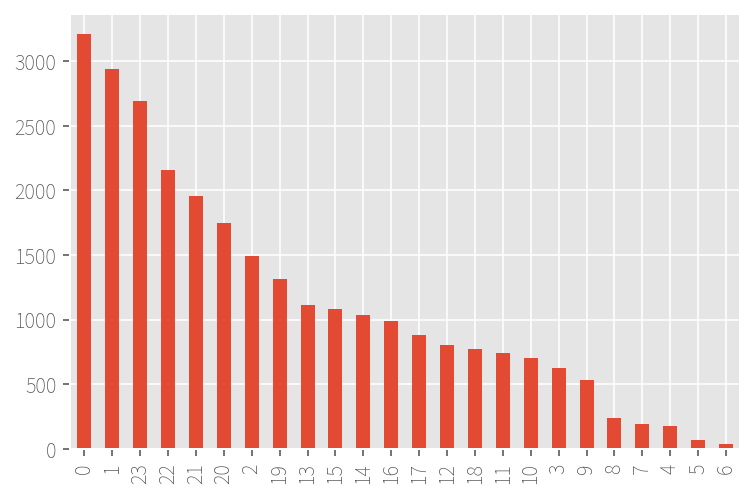

In [92]:
df['Hour'].value_counts().plot(kind='bar')

In [93]:
count_per_hour = df['Hour'].value_counts()
count_per_hour

0     3209
1     2942
23    2690
22    2156
21    1958
20    1748
2     1491
19    1312
13    1111
15    1083
14    1032
16     985
17     884
12     806
18     775
11     740
10     699
3      624
9      533
8      240
7      187
4      177
5       64
6       36
Name: Hour, dtype: int64

In [94]:
x = count_per_hour.index.tolist()
x

[0,
 1,
 23,
 22,
 21,
 20,
 2,
 19,
 13,
 15,
 14,
 16,
 17,
 12,
 18,
 11,
 10,
 3,
 9,
 8,
 7,
 4,
 5,
 6]

In [95]:
y = count_per_hour.tolist()
y

[3209,
 2942,
 2690,
 2156,
 1958,
 1748,
 1491,
 1312,
 1111,
 1083,
 1032,
 985,
 884,
 806,
 775,
 740,
 699,
 624,
 533,
 240,
 187,
 177,
 64,
 36]

In [96]:
list(range(24))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

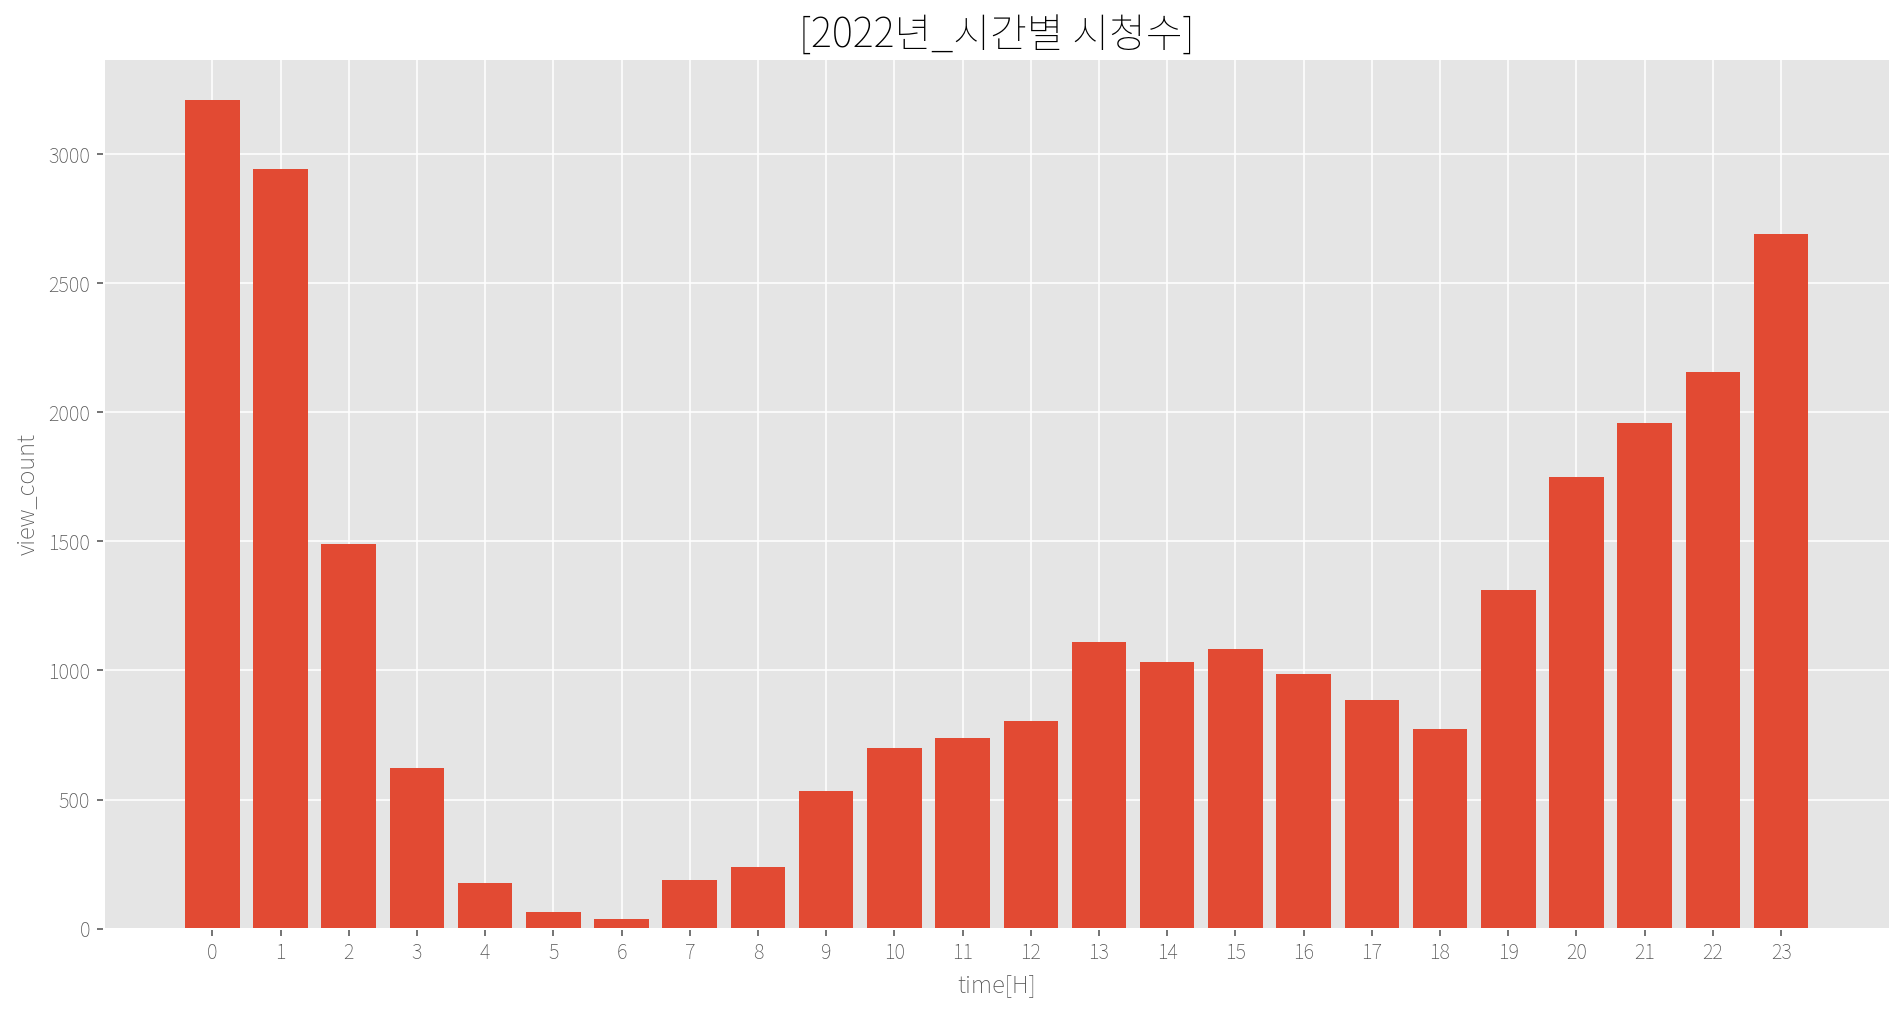

In [97]:
#정렬: time 순
top10_22 = pd.DataFrame(df_22['name'].value_counts().head(10))
top10_22 = top10_22.reset_index()
top10_22 = top10_22.rename(columns={'index':'Name','name':'Count'})

plt.figure(figsize=(16,8))
plt.title("[2022년_시간별 시청수]", size=20)

plt.xlabel("time[H]")
plt.xticks(list(range(24)))
plt.ylabel("view_count")
plt.bar(x, y)

plt.show()

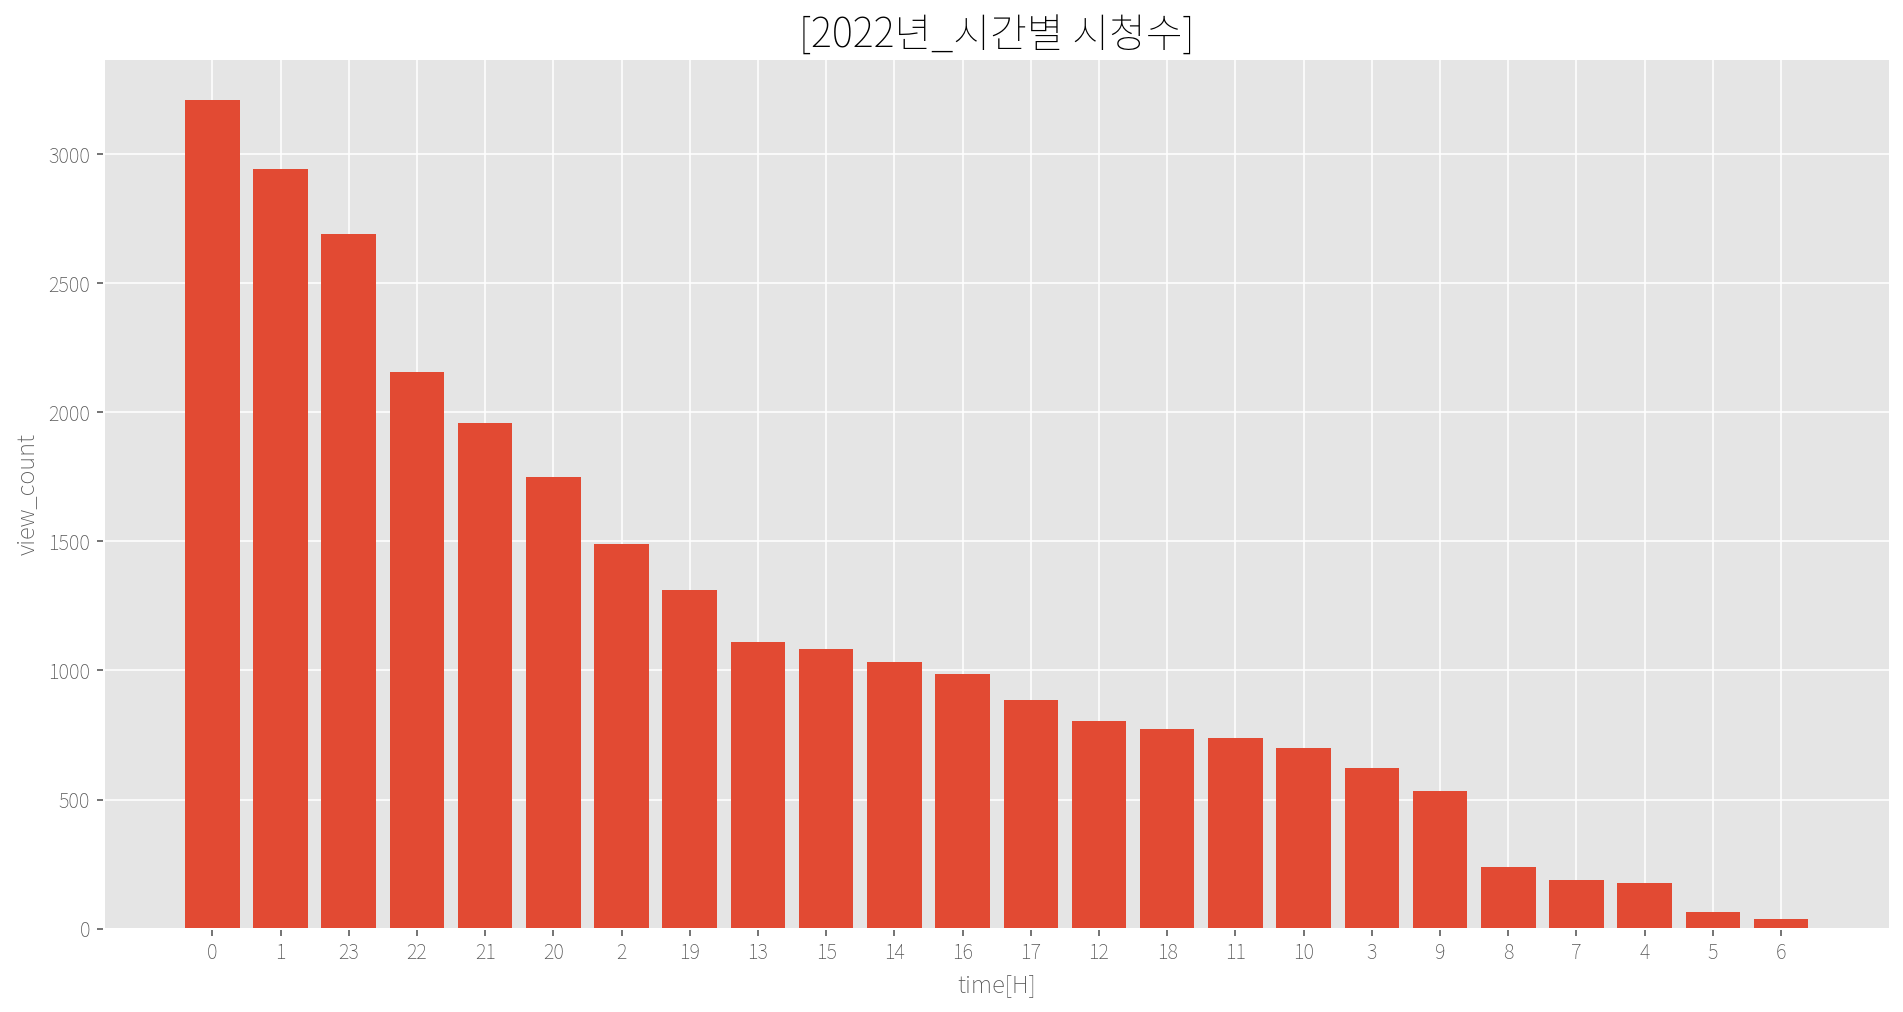

In [98]:
#정렬: count 순
plt.figure(figsize=(16,8))
plt.title("[2022년_시간별 시청수]", size=20)

plt.bar(list(map(str, x)), y)
plt.xlabel("time[H]")
plt.xticks(list(range(24)))
plt.ylabel("view_count")

plt.show() 

## 주중

In [99]:
# 2022년도
df_22 = df[df['Year'] == 2022]
df_22

,header,title,titleUrl,subtitles,time,products,activityControls,description,details,name,url,is_subscribe,ktime,Year,Month,Day,Day_name,Hour,Minute,Second
0,YouTube,[Playlist] 나른하게 불어오는 봄바람에 🌻ㅣ따뜻한 봄날의 여유로움을 만끽하면...,https://www.youtube.com/watch?v=ZTaB-1RkQ_w,"[{'name': 'essential;', 'url': 'https://www.yo...",2022-04-05 00:28:35.867000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,essential;,https://www.youtube.com/channel/UCSGC87iX0QhnI...,True,2022-04-05 09:28:35.867,2022,4,5,Tuesday,9,28,35
1,YouTube,"오를 때 된 삼성전자 ""3분기, 더할나위 없이 좋다"" / 김선형의 팩트체크 / 투자...",https://www.youtube.com/watch?v=aTdDx9-4OVM,"[{'name': '한국경제TV', 'url': 'https://www.youtub...",2022-04-05 00:27:52.740000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,한국경제TV,https://www.youtube.com/channel/UCF8AeLlUbEpKj...,True,2022-04-05 09:27:52.740,2022,4,5,Tuesday,9,27,52
2,YouTube,달려라방탄 💜 Run bts 💜 58회 을(를) 시청했습니다.,https://www.youtube.com/watch?v=SDPT_RO3tMI,"[{'name': '🥔 감자', 'url': 'https://www.youtube....",2022-04-04 14:55:40.984000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,🥔 감자,https://www.youtube.com/channel/UCqJjeqc6lSedC...,False,2022-04-04 23:55:40.984,2022,4,4,Monday,23,55,40
3,YouTube,방탄소년단 (BTS) '작은 것들을 위한 시 (Boy With Luv)' 교차편집 ...,https://www.youtube.com/watch?v=oFuY5M1lwiY,"[{'name': '호구마 HOGUMA', 'url': 'https://www.yo...",2022-04-04 14:48:08.103000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,호구마 HOGUMA,https://www.youtube.com/channel/UC07i8JgLI1h8O...,False,2022-04-04 23:48:08.103,2022,4,4,Monday,23,48,8
4,YouTube,[2019 FESTA] BTS (방탄소년단) '방탄다락' #2019BTSFESTA ...,https://www.youtube.com/watch?v=CPW2PCPYzEE,"[{'name': 'BANGTANTV', 'url': 'https://www.you...",2022-04-04 14:47:52.304000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,BANGTANTV,https://www.youtube.com/channel/UCLkAepWjdylmX...,True,2022-04-04 23:47:52.304,2022,4,4,Monday,23,47,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,YouTube,[해피투게더]스타들의 별난 개인기_정혜성_주토피아 나무늘보 완벽복사 을(를) 시청했...,https://www.youtube.com/watch?v=kiViCWpr4rE,"[{'name': 'KBS HUMAN: 뭉클티비', 'url': 'https://w...",2022-01-02 01:54:58.663000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,KBS HUMAN: 뭉클티비,https://www.youtube.com/channel/UC6wiUwl7dPhZO...,False,2022-01-02 10:54:58.663,2022,1,2,Sunday,10,54,58
2163,YouTube,[Playlist] 사르르 부드럽게 녹아드는ㅣ추운 날 듣기 좋은 멜로우 알앤비ㅣme...,https://www.youtube.com/watch?v=z060aThI9qM,"[{'name': 'essential;', 'url': 'https://www.yo...",2022-01-01 10:39:43.910000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,essential;,https://www.youtube.com/channel/UCSGC87iX0QhnI...,True,2022-01-01 19:39:43.910,2022,1,1,Saturday,19,39,43
2164,YouTube,[Playlist] 추운 겨울 따뜻한 위스키 한 잔ㅣ글렌피딕과 함께하는 무드있는 연...,https://www.youtube.com/watch?v=qDBaVO-B42E,"[{'name': 'essential;', 'url': 'https://www.yo...",2022-01-01 10:39:32.514000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,essential;,https://www.youtube.com/channel/UCSGC87iX0QhnI...,True,2022-01-01 19:39:32.514,2022,1,1,Saturday,19,39,32
2165,YouTube,(ENG) 띵동📣 띵동📣 주문 제발 🍗닭🍗쳐... 주문폭주에 멘탈 순살치킨 됨 | ...,https://www.youtube.com/watch?v=bApoYZBPCLE,"[{'name': '워크맨-Workman', 'url': 'https://www.y...",2022-01-01 07:02:28.591000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,워크맨-Workman,https://www.youtube.com/channel/UCwx6n_4OcLgzA...,True,2022-01-01 16:02:28.591,2022,1,1,Saturday,16,2,28


In [100]:
df['dayofweek'] = df.time.dt.dayofweek
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,header,title,titleUrl,subtitles,time,products,activityControls,description,details,name,...,is_subscribe,ktime,Year,Month,Day,Day_name,Hour,Minute,Second,dayofweek
0,YouTube,[Playlist] 나른하게 불어오는 봄바람에 🌻ㅣ따뜻한 봄날의 여유로움을 만끽하면...,https://www.youtube.com/watch?v=ZTaB-1RkQ_w,"[{'name': 'essential;', 'url': 'https://www.yo...",2022-04-05 00:28:35.867000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,essential;,...,True,2022-04-05 09:28:35.867,2022,4,5,Tuesday,9,28,35,1
1,YouTube,"오를 때 된 삼성전자 ""3분기, 더할나위 없이 좋다"" / 김선형의 팩트체크 / 투자...",https://www.youtube.com/watch?v=aTdDx9-4OVM,"[{'name': '한국경제TV', 'url': 'https://www.youtub...",2022-04-05 00:27:52.740000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,한국경제TV,...,True,2022-04-05 09:27:52.740,2022,4,5,Tuesday,9,27,52,1
2,YouTube,달려라방탄 💜 Run bts 💜 58회 을(를) 시청했습니다.,https://www.youtube.com/watch?v=SDPT_RO3tMI,"[{'name': '🥔 감자', 'url': 'https://www.youtube....",2022-04-04 14:55:40.984000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,🥔 감자,...,False,2022-04-04 23:55:40.984,2022,4,4,Monday,23,55,40,0
3,YouTube,방탄소년단 (BTS) '작은 것들을 위한 시 (Boy With Luv)' 교차편집 ...,https://www.youtube.com/watch?v=oFuY5M1lwiY,"[{'name': '호구마 HOGUMA', 'url': 'https://www.yo...",2022-04-04 14:48:08.103000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,호구마 HOGUMA,...,False,2022-04-04 23:48:08.103,2022,4,4,Monday,23,48,8,0
4,YouTube,[2019 FESTA] BTS (방탄소년단) '방탄다락' #2019BTSFESTA ...,https://www.youtube.com/watch?v=CPW2PCPYzEE,"[{'name': 'BANGTANTV', 'url': 'https://www.you...",2022-04-04 14:47:52.304000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,BANGTANTV,...,True,2022-04-04 23:47:52.304,2022,4,4,Monday,23,47,52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31142,YouTube,헝가리 아이들이 한국어를 만났을 때(Hungarian Kids React to Ko...,https://www.youtube.com/watch?v=ELEZ-1rAWsI,"[{'name': '문화포털', 'url': 'https://www.youtube....",2016-07-18 15:03:27.782000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,문화포털,...,False,2016-07-19 00:03:27.782,2016,7,19,Tuesday,0,3,27,0
31143,YouTube,외국인이 이해 못하는 영어 발음실수 1탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=GvK9fXMwIHs,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18 15:02:23.726000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,...,False,2016-07-19 00:02:23.726,2016,7,19,Tuesday,0,2,23,0
31144,YouTube,외국인이 이해 못하는 영어 발음실수 2탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=mm3ePulc-SQ,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18 15:02:17.339000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,...,False,2016-07-19 00:02:17.339,2016,7,19,Tuesday,0,2,17,0
31145,YouTube,미국남자VS 한국남자 연애스타일 차이 을(를) 시청했습니다.,https://www.youtube.com/watch?v=cG5-B2l589Y,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18 15:00:33.026000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,...,False,2016-07-19 00:00:33.026,2016,7,19,Tuesday,0,0,33,0


In [101]:
df['dayofweek'] < 5

0        True
1        True
2        True
3        True
4        True
         ... 
31142    True
31143    True
31144    True
31145    True
31147    True
Name: dayofweek, Length: 27482, dtype: bool

## 주말

In [102]:
df['dayofweek'] >= 5

0        False
1        False
2        False
3        False
4        False
         ...  
31142    False
31143    False
31144    False
31145    False
31147    False
Name: dayofweek, Length: 27482, dtype: bool

# (2) 주중/주말 - 시각화

In [103]:
df_exceptweekend = df[df['dayofweek'] < 5]

In [104]:
df_exceptweekend = df_exceptweekend['Day_name'].value_counts().loc[['Monday','Tuesday','Wednesday','Thursday','Friday']]

In [105]:
df_week = df['Day_name'].value_counts().loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
df_week

Monday       4032
Tuesday      5052
Wednesday    3880
Thursday     3826
Friday       3772
Saturday     3484
Sunday       3436
Name: Day_name, dtype: int64

### Q label rotation

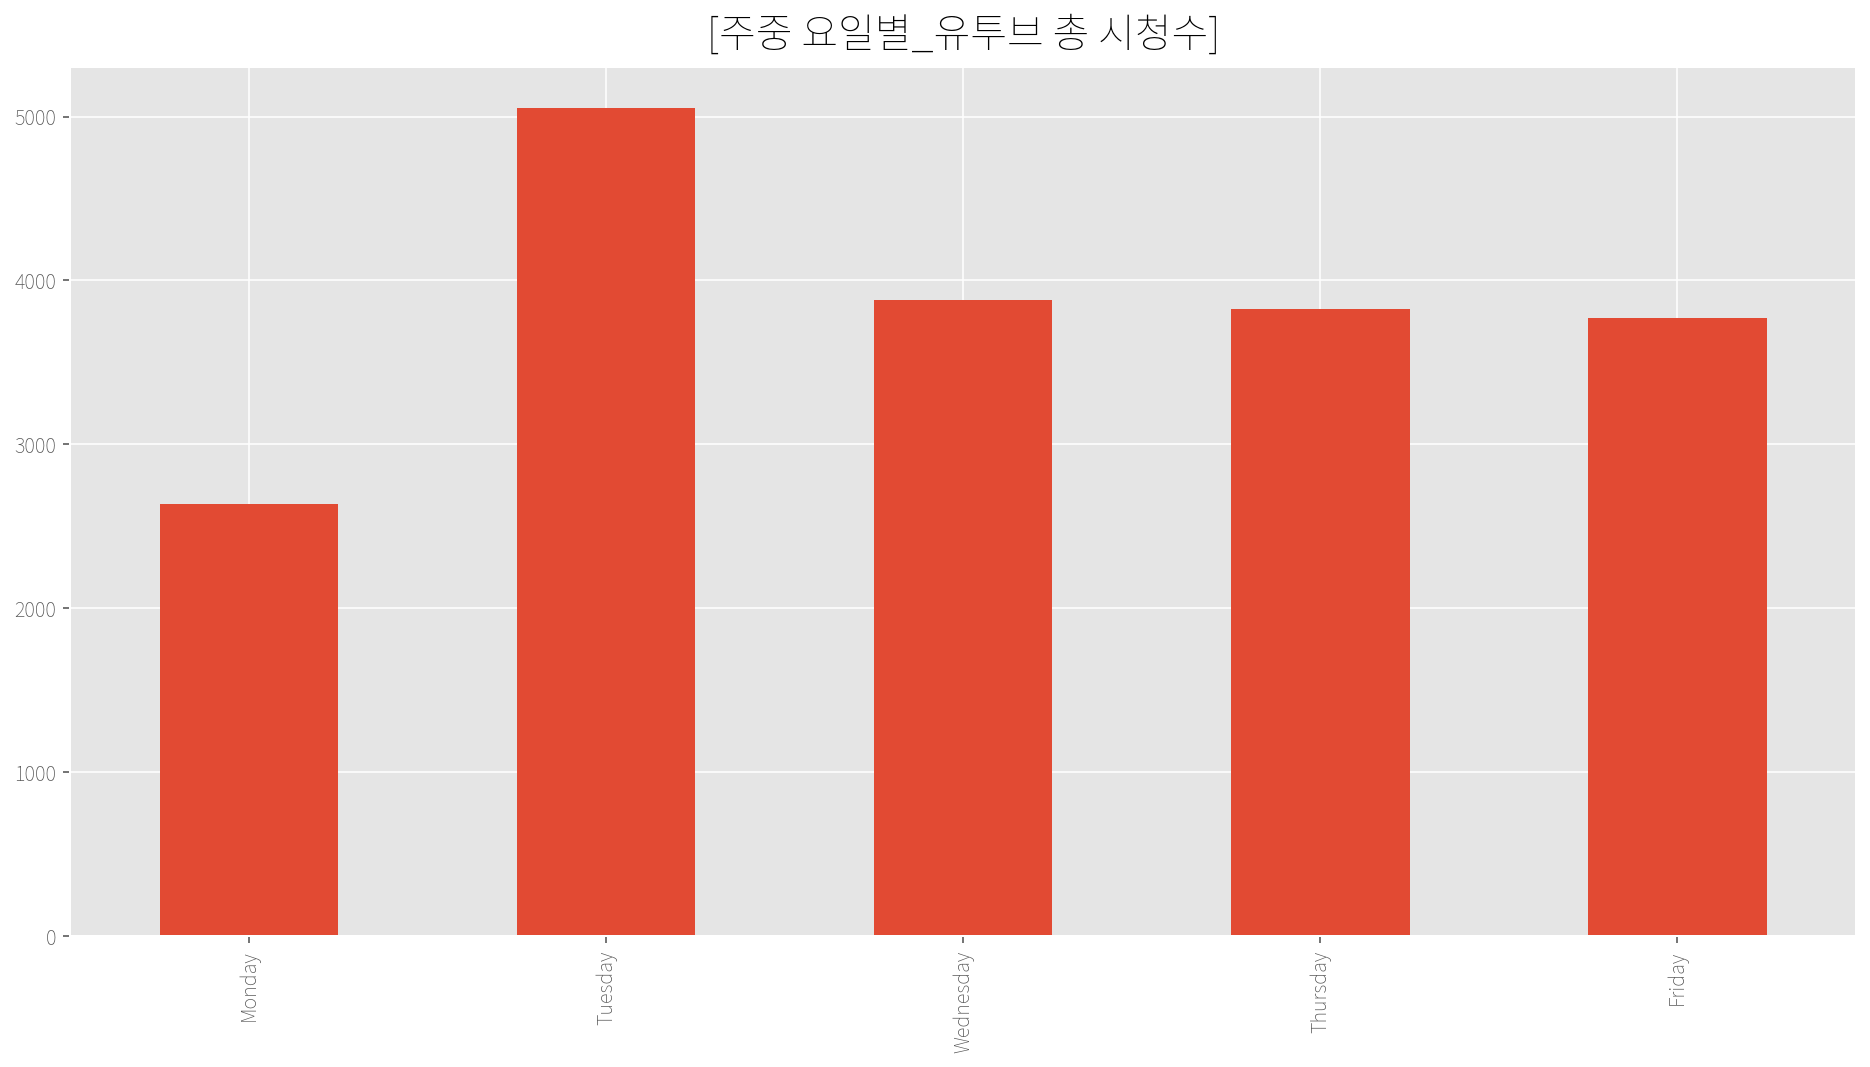

In [106]:
# 2016년부터 총 데이터
plt.figure(figsize=(16, 8))
plt.title("[주중 요일별_유투브 총 시청수]", size=20, pad=10)
df_exceptweekend.plot(kind = 'bar')

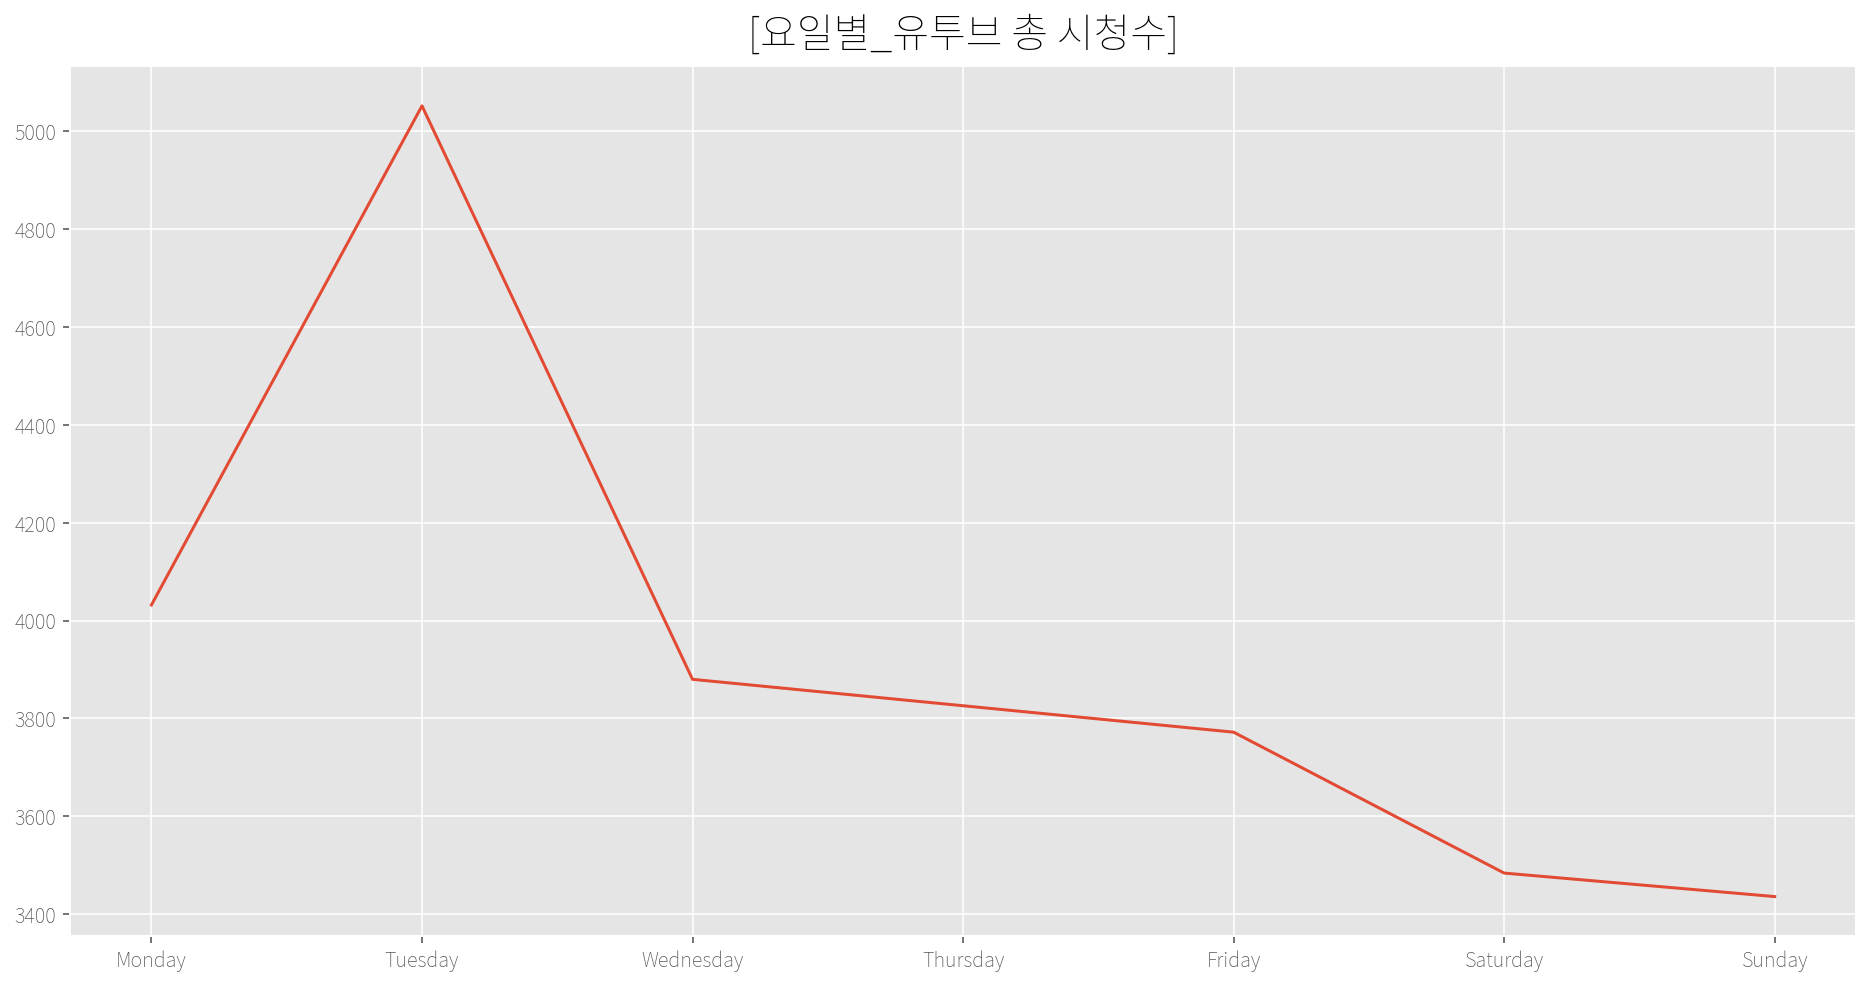

In [107]:
plt.figure(figsize=(16, 8))
plt.title("[요일별_유투브 총 시청수]", size=20, pad=10)
df_week.plot()

## 추가 검증: 데이터(특정 요일 추출)

In [108]:
play_list_tues = df[df['Day_name'] == 'Tuesday']

In [109]:
play_list_tues

,header,title,titleUrl,subtitles,time,products,activityControls,description,details,name,...,is_subscribe,ktime,Year,Month,Day,Day_name,Hour,Minute,Second,dayofweek
0,YouTube,[Playlist] 나른하게 불어오는 봄바람에 🌻ㅣ따뜻한 봄날의 여유로움을 만끽하면...,https://www.youtube.com/watch?v=ZTaB-1RkQ_w,"[{'name': 'essential;', 'url': 'https://www.yo...",2022-04-05 00:28:35.867000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,essential;,...,True,2022-04-05 09:28:35.867,2022,4,5,Tuesday,9,28,35,1
1,YouTube,"오를 때 된 삼성전자 ""3분기, 더할나위 없이 좋다"" / 김선형의 팩트체크 / 투자...",https://www.youtube.com/watch?v=aTdDx9-4OVM,"[{'name': '한국경제TV', 'url': 'https://www.youtub...",2022-04-05 00:27:52.740000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,한국경제TV,...,True,2022-04-05 09:27:52.740,2022,4,5,Tuesday,9,27,52,1
112,YouTube,[Playlist] 내가 사랑한 이루마의 음악 을(를) 시청했습니다.,https://www.youtube.com/watch?v=6HzqDQmYlfY,"[{'name': 'my blue valentine', 'url': 'https:/...",2022-03-29 11:35:49.437000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,my blue valentine,...,True,2022-03-29 20:35:49.437,2022,3,29,Tuesday,20,35,49,1
113,YouTube,"공부할 때, 자기 전에 듣기 좋은 메이플스토리 명곡 BGM 33선 피아노 모음 Ma...",https://www.youtube.com/watch?v=-FMHYjqC4iA,"[{'name': 'Pair Piano', 'url': 'https://www.yo...",2022-03-29 11:26:08.122000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,Pair Piano,...,False,2022-03-29 20:26:08.122,2022,3,29,Tuesday,20,26,8,1
114,YouTube,"[드라마 BGM] 잔잔하고 아련한 ""사극"" 경음악 모음 (가사無/2시간) 을(를) ...",https://www.youtube.com/watch?v=GPOpW4uoC_8,"[{'name': '박드덕', 'url': 'https://www.youtube.c...",2022-03-29 11:26:02.152000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,박드덕,...,False,2022-03-29 20:26:02.152,2022,3,29,Tuesday,20,26,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31137,YouTube,[ENG] 촉촉한 개강 메이크업 - Back To School Makeup | 다또...,https://www.youtube.com/watch?v=H_o3bjBeaI0,"[{'name': '다또아Daddoa', 'url': 'https://www.you...",2016-07-18 15:54:37.193000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,다또아Daddoa,...,False,2016-07-19 00:54:37.193,2016,7,19,Tuesday,0,54,37,0
31142,YouTube,헝가리 아이들이 한국어를 만났을 때(Hungarian Kids React to Ko...,https://www.youtube.com/watch?v=ELEZ-1rAWsI,"[{'name': '문화포털', 'url': 'https://www.youtube....",2016-07-18 15:03:27.782000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,문화포털,...,False,2016-07-19 00:03:27.782,2016,7,19,Tuesday,0,3,27,0
31143,YouTube,외국인이 이해 못하는 영어 발음실수 1탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=GvK9fXMwIHs,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18 15:02:23.726000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,...,False,2016-07-19 00:02:23.726,2016,7,19,Tuesday,0,2,23,0
31144,YouTube,외국인이 이해 못하는 영어 발음실수 2탄 을(를) 시청했습니다.,https://www.youtube.com/watch?v=mm3ePulc-SQ,"[{'name': '올리버쌤', 'url': 'https://www.youtube....",2016-07-18 15:02:17.339000+00:00,[YouTube],[YouTube 시청 기록],NaN,NaN,올리버쌤,...,False,2016-07-19 00:02:17.339,2016,7,19,Tuesday,0,2,17,0


# 3) 파이참/웹